In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [2]:
df = pd.read_csv('Data.csv')

#Glimpse of Data
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [3]:
# Get the number of rows and columns
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 25000, Columns: 24


In [4]:
# Check unique categories for categorical variables
print(df['adventure_sports'].unique())
print(df['Occupation'].unique())
print(df['heart_decs_history'].unique())
print(df['other_major_decs_history'].unique())
print(df['Gender'].unique())
print(df['smoking_status'].unique())
print(df['covered_by_any_other_company'].unique())
print(df['Alcohol'].unique())
print(df['exercise'].unique())
print(df['Location'].unique())

[1 0]
['Salried' 'Student' 'Business']
[1 0]
[0 1]
['Male' 'Female']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']
['N' 'Y']
['Rare' 'Daily' 'No']
['Moderate' 'Extreme' 'No']
['Chennai' 'Jaipur' 'Bangalore' 'Bhubaneswar' 'Guwahati' 'Mumbai' 'Nagpur'
 'Surat' 'Pune' 'Kanpur' 'Mangalore' 'Kolkata' 'Delhi' 'Ahmedabad'
 'Lucknow']


In [5]:
# Check value counts of categorical variables
print(df['adventure_sports'].value_counts())
print(df['Occupation'].value_counts())
print(df['heart_decs_history'].value_counts())
print(df['other_major_decs_history'].value_counts())
print(df['Gender'].value_counts())
print(df['smoking_status'].value_counts())
print(df['covered_by_any_other_company'].value_counts())
print(df['Alcohol'].value_counts())
print(df['exercise'].value_counts())
print(df['Location'].value_counts())


adventure_sports
0    22957
1     2043
Name: count, dtype: int64
Occupation
Student     10169
Business    10020
Salried      4811
Name: count, dtype: int64
heart_decs_history
0    23634
1     1366
Name: count, dtype: int64
other_major_decs_history
0    22546
1     2454
Name: count, dtype: int64
Gender
Male      16422
Female     8578
Name: count, dtype: int64
smoking_status
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: count, dtype: int64
covered_by_any_other_company
N    17418
Y     7582
Name: count, dtype: int64
Alcohol
Rare     13752
No        8541
Daily     2707
Name: count, dtype: int64
exercise
Moderate    14638
Extreme      5248
No           5114
Name: count, dtype: int64
Location
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune    

In [6]:
# Get a summary of the dataset (descriptive statistics)
df.describe().T



,count,mean,std,min,25%,50%,75%,max
applicant_id,25000.0,17499.500000,7217.022701,5000.0,11249.75,17499.5,23749.25,29999.0
years_of_insurance_with_us,25000.0,4.089040,2.606612,0.0,2.00,4.0,6.00,8.0
regular_checkup_lasy_year,25000.0,0.773680,1.199449,0.0,0.00,0.0,1.00,5.0
adventure_sports,25000.0,0.081720,0.273943,0.0,0.00,0.0,0.00,1.0
visited_doctor_last_1_year,25000.0,3.104200,1.141663,0.0,2.00,3.0,4.00,12.0
daily_avg_steps,25000.0,5215.889320,1053.179748,2034.0,4543.00,5089.0,5730.00,11255.0
age,25000.0,44.918320,16.107492,16.0,31.00,45.0,59.00,74.0
heart_decs_history,25000.0,0.054640,0.227281,0.0,0.00,0.0,0.00,1.0
other_major_decs_history,25000.0,0.098160,0.297537,0.0,0.00,0.0,0.00,1.0
avg_glucose_level,25000.0,167.530000,62.729712,57.0,113.00,168.0,222.00,277.0


In [7]:
# Descriptive statistics for categorical variables
print(df.describe(include=['object', 'category']))


       Occupation cholesterol_level Gender smoking_status   Location  \
count       25000             25000  25000          25000      25000   
unique          3                 5      2              4         15   
top       Student        150 to 175   Male   never smoked  Bangalore   
freq        10169              8763  16422           9249       1742   

       covered_by_any_other_company Alcohol  exercise  
count                         25000   25000     25000  
unique                            2       3         3  
top                               N    Rare  Moderate  
freq                          17418   13752     14638  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [9]:
# Check for missing values in the dataset
df.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

### Univariate Analysis

- Univariate analysis helps us understand the distribution and spread of individual features in the dataset. It is split into two parts:

#### Continuous Attributes: For numerical variables, we'll analyze the distribution and spread using histograms and box plots.

#### Categorical Attributes: For categorical variables, we'll look at the frequency distribution using bar plots.

1. Univariate Analysis for Continuous Attributes

We will analyze continuous variables such as age, cholesterol_level, bmi, and others using the following plots:

•	Histograms: Show the frequency of observations in different bins.

•	Box Plots: Show the spread of the data and highlight any potential outliers.


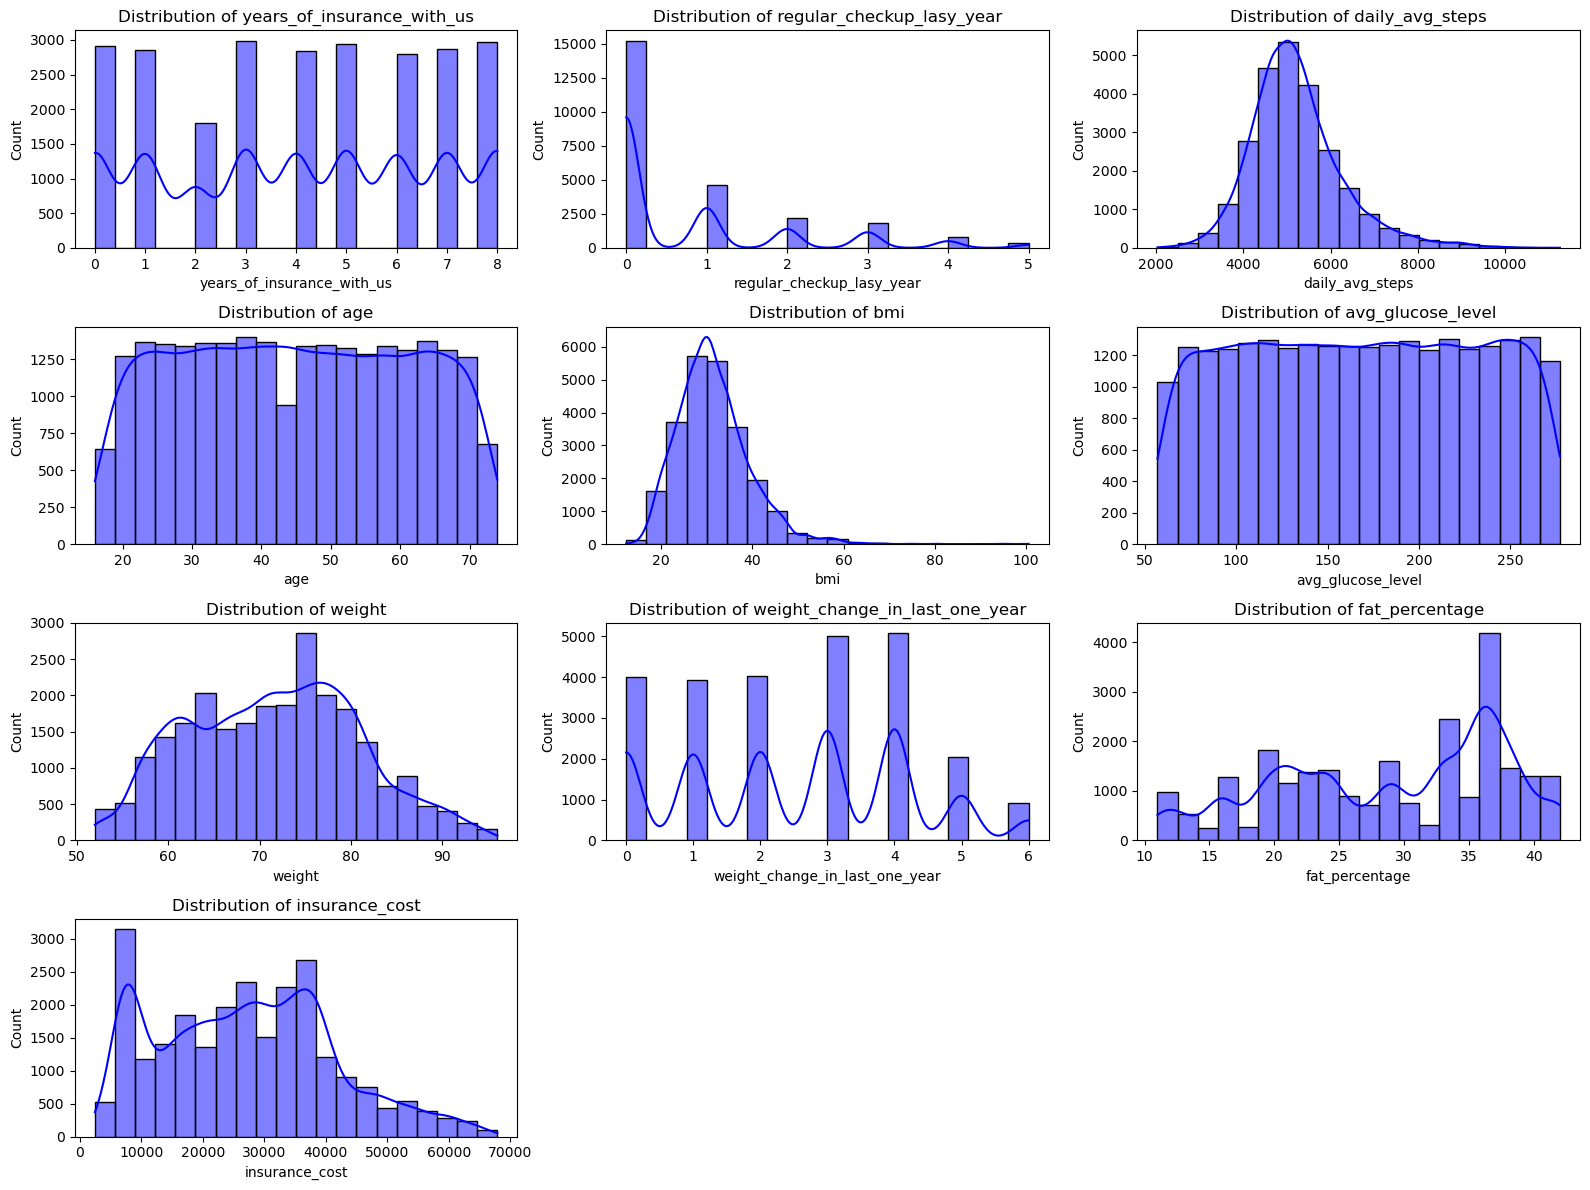

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous variables
continuous_vars = ['years_of_insurance_with_us', 'regular_checkup_lasy_year', 
                   'daily_avg_steps', 'age', 'bmi', 
                   'avg_glucose_level', 'weight', 'weight_change_in_last_one_year', 
                   'fat_percentage', 'insurance_cost']

# Plot histograms for continuous variables
plt.figure(figsize=(16, 12))

for i, var in enumerate(continuous_vars):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[var], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


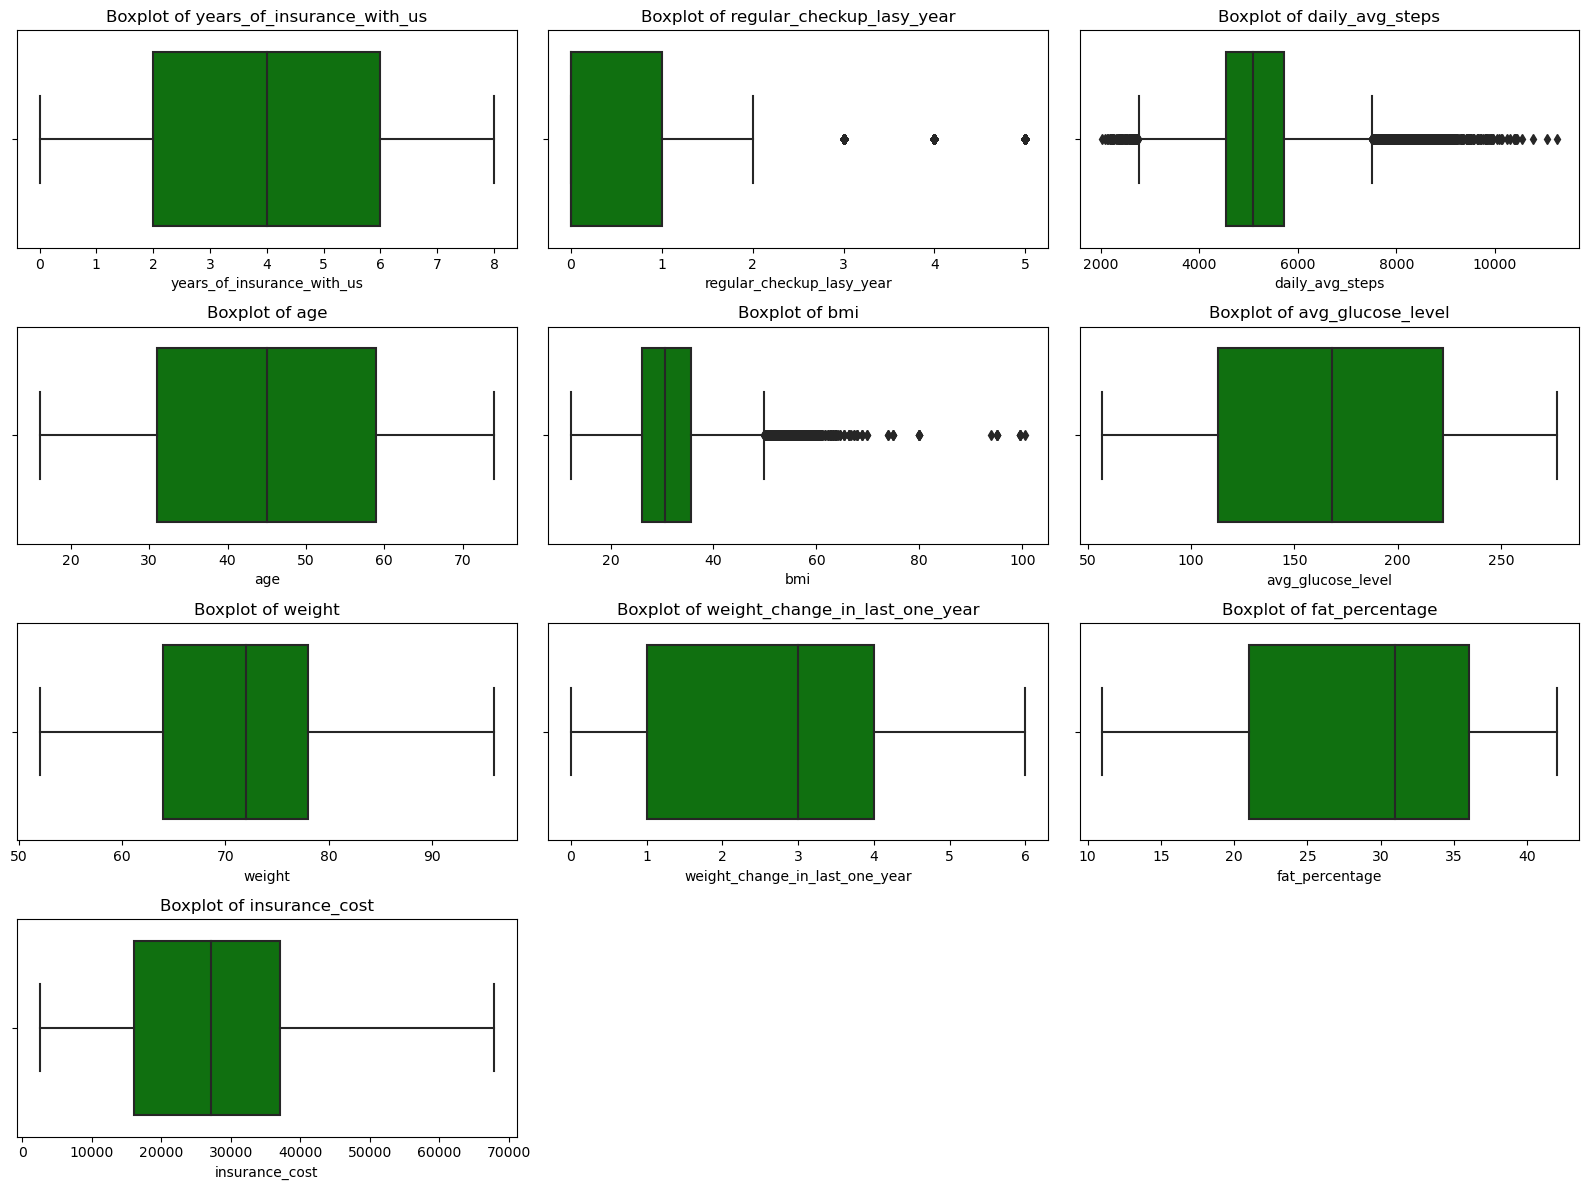

In [11]:
plt.figure(figsize=(16, 12))

for i, var in enumerate(continuous_vars):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[var], color='green')
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()


### Univariate Analysis for Categorical Attributes
- For categorical variables like Gender, Occupation, smoking_status, etc., we use bar plots to show the frequency distribution.

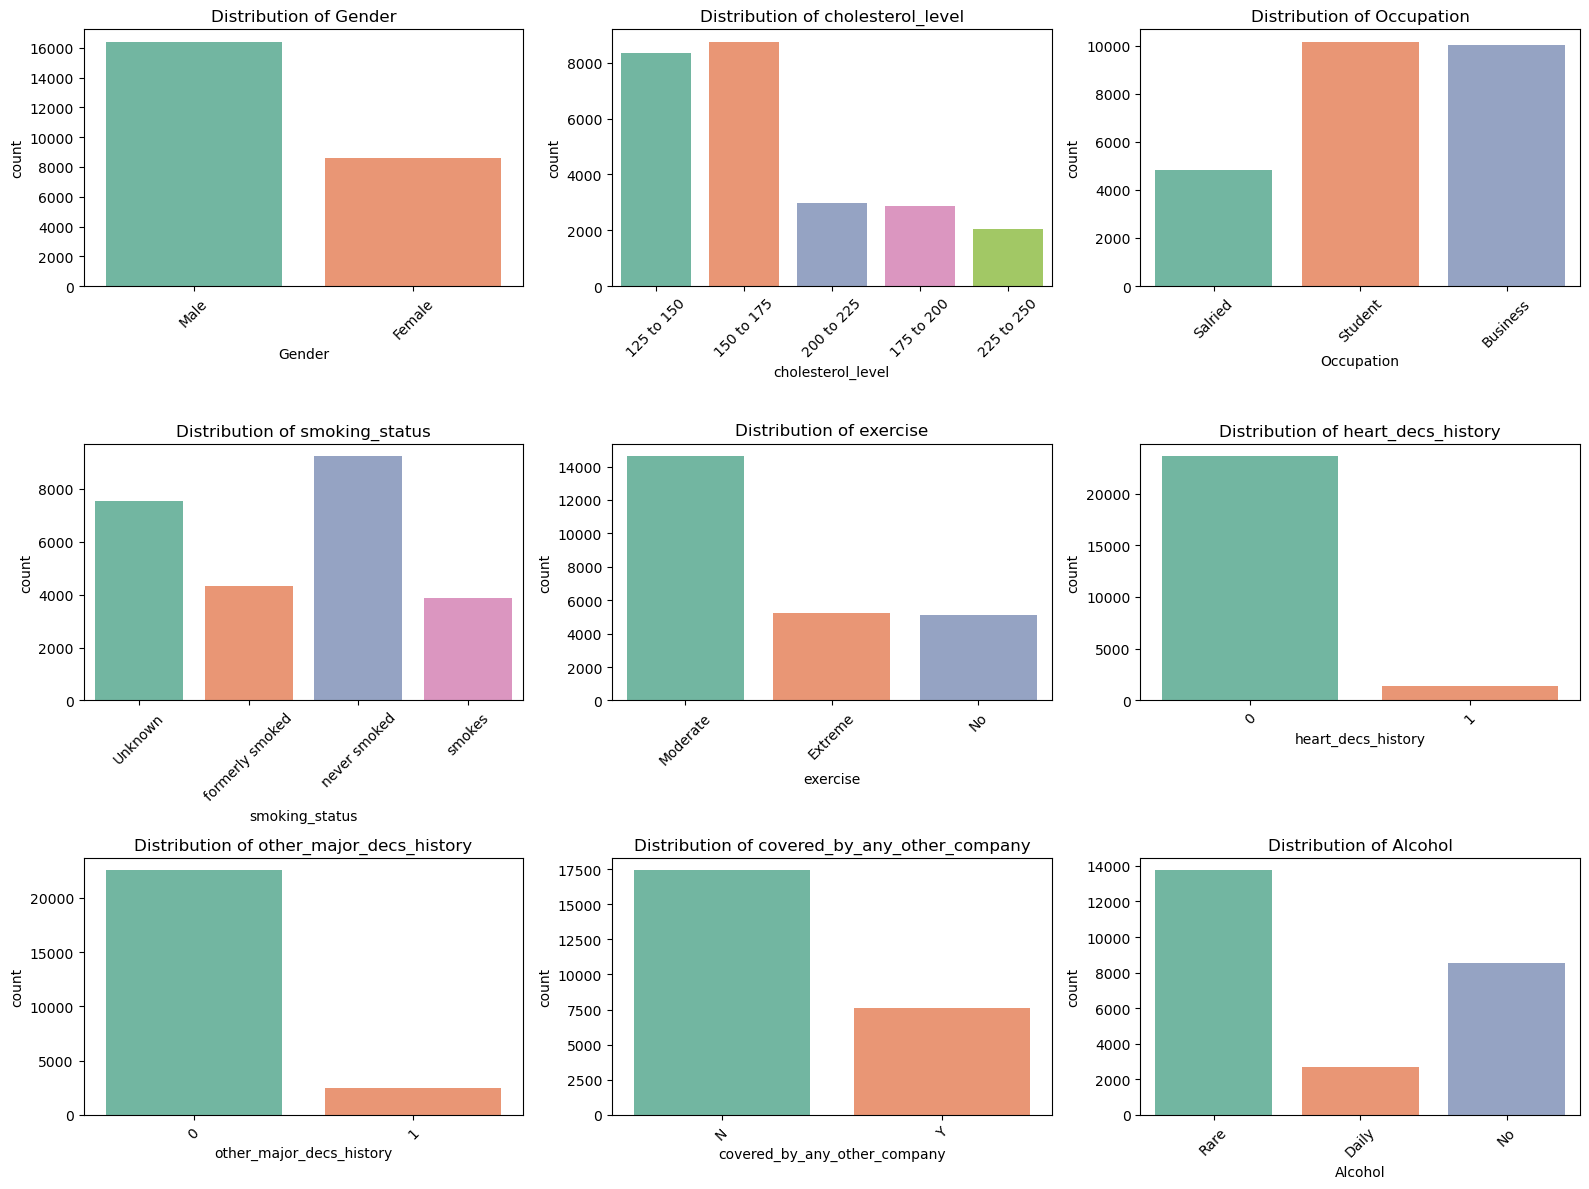

In [12]:
# List of categorical variables
categorical_vars = ['Gender', 'cholesterol_level','Occupation', 'smoking_status', 'exercise', 
                    'heart_decs_history', 'other_major_decs_history', 
                    'covered_by_any_other_company', 'Alcohol']

# Plot bar plots for categorical variables
plt.figure(figsize=(16, 12))

for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=var, palette='Set2')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Key Observations from Univariate Analysis:
#### Numerical Variables:

- The insurance_cost distribution may show a right-skewed pattern with some high-cost outliers.
- Age might follow a relatively normal distribution, with most individuals being in a certain age range.
- BMI could show a varied range and may have outliers for extremely low or high BMI values.
#### Categorical Variables:

- The Gender distribution could show a balanced or skewed ratio between male and female.
- Smoking status might have different frequencies for categories like "formerly smoked", "smokes", and "never smoked".
- The distribution of exercise habits might show that most individuals engage in moderate or extreme exercise.
  
  This gives a detailed univariate analysis for both numerical and categorical variables.

### b) Bivariate analysis (relationship between different variables , correlations)

#### Bivariate Analysis for Categorical vs Continuous Variables
- For relationships between categorical and continuous variables, we will use box plots and violin plots to analyze how continuous variables (like insurance_cost) vary across categories.

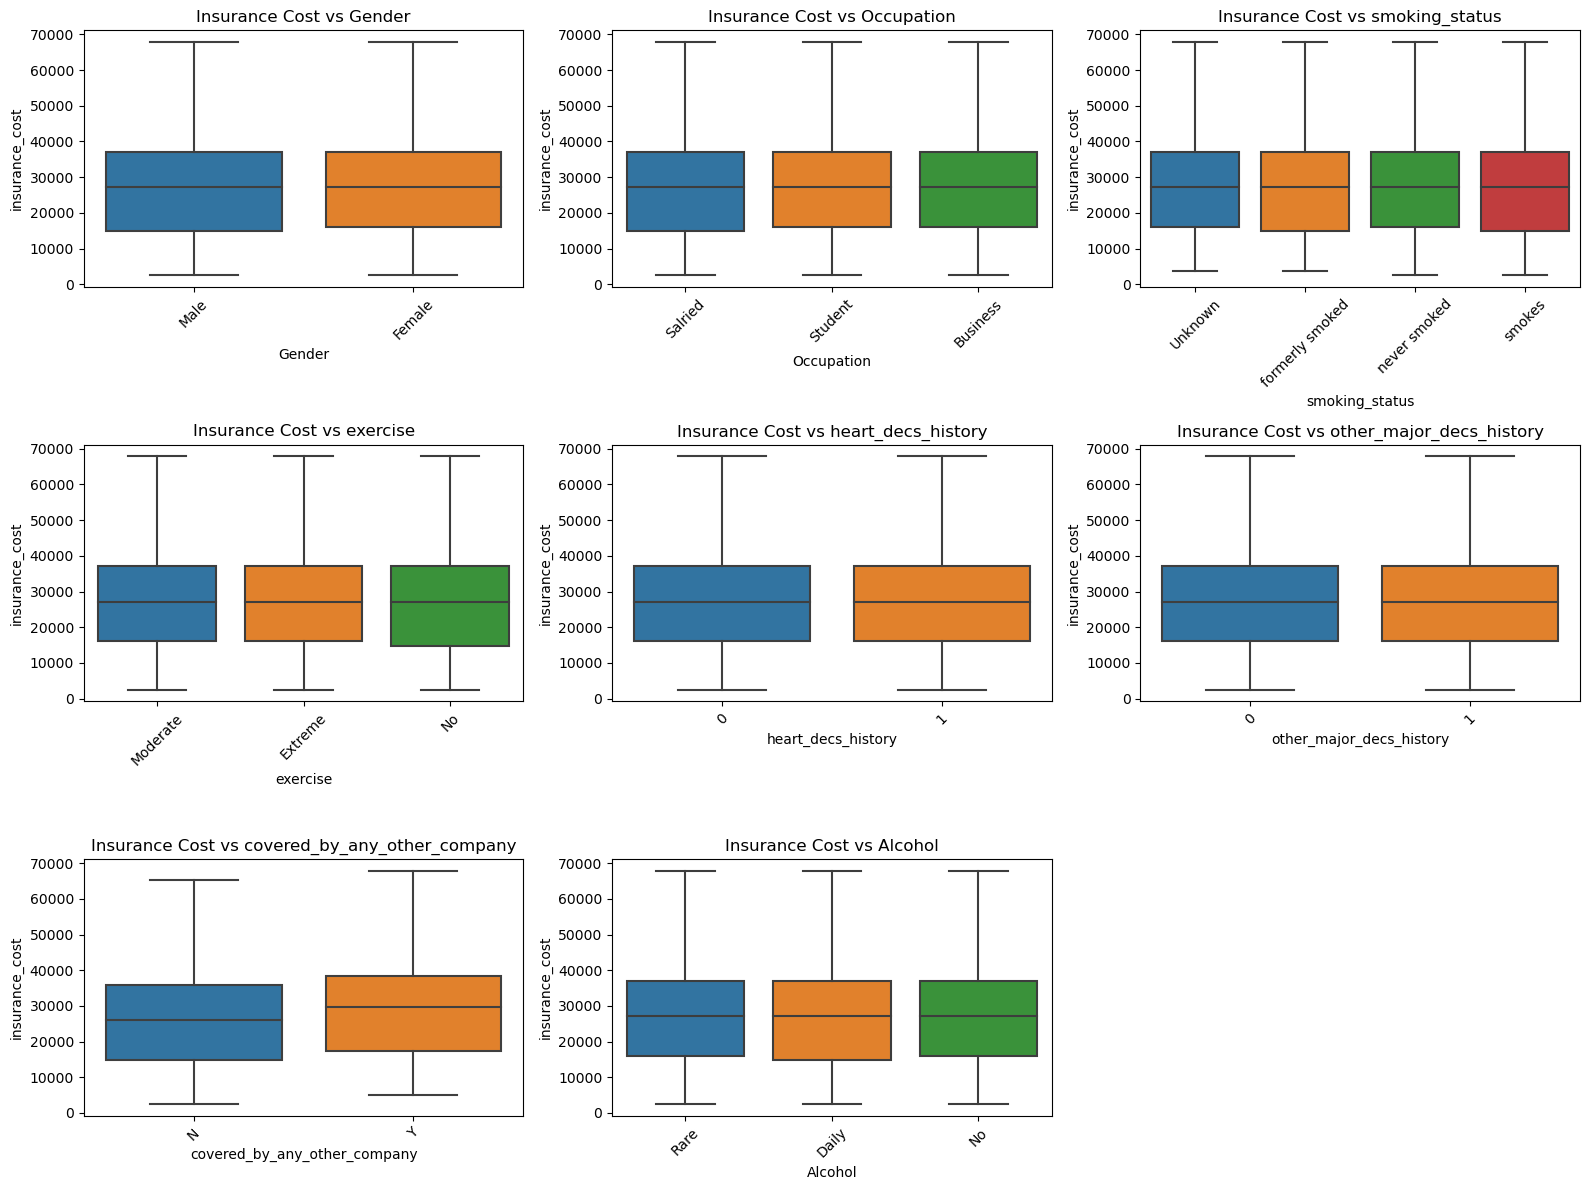

In [13]:
# List of categorical variables
categorical_vars = ['Gender', 'Occupation', 'smoking_status', 'exercise', 
                    'heart_decs_history', 'other_major_decs_history', 
                    'covered_by_any_other_company', 'Alcohol']

# Plot box plots for continuous variables vs categorical variables
plt.figure(figsize=(16, 12))

for i, cat_var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=cat_var, y='insurance_cost')
    plt.title(f'Insurance Cost vs {cat_var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Explanation:

  Box Plots: Box plots show how the distribution of a continuous variable (insurance_cost) varies based on categories.
  
  
 - Insurance Cost vs Smoking Status: This box plot might reveal that smokers have higher insurance costs compared to non-smokers.
  
 -  Insurance Cost vs Gender: We can see if there are differences in insurance costs between male and female customers.
 
 - Insurance Cost vs exercise: This box plot might reveal that who exercises moderate or extreme have to pay less insurance cost compared to customers who doesent exercise at all.
 
 -  Insurance Cost vs Alcohol: This box plot might reveal that who drinks alcohol daily have to pay higher amount of insurance cost than who drinks rare or doesent drinks at all as customers drinking daily have a higher chance of getting sick more often than the customers who rarely or doesent drink.

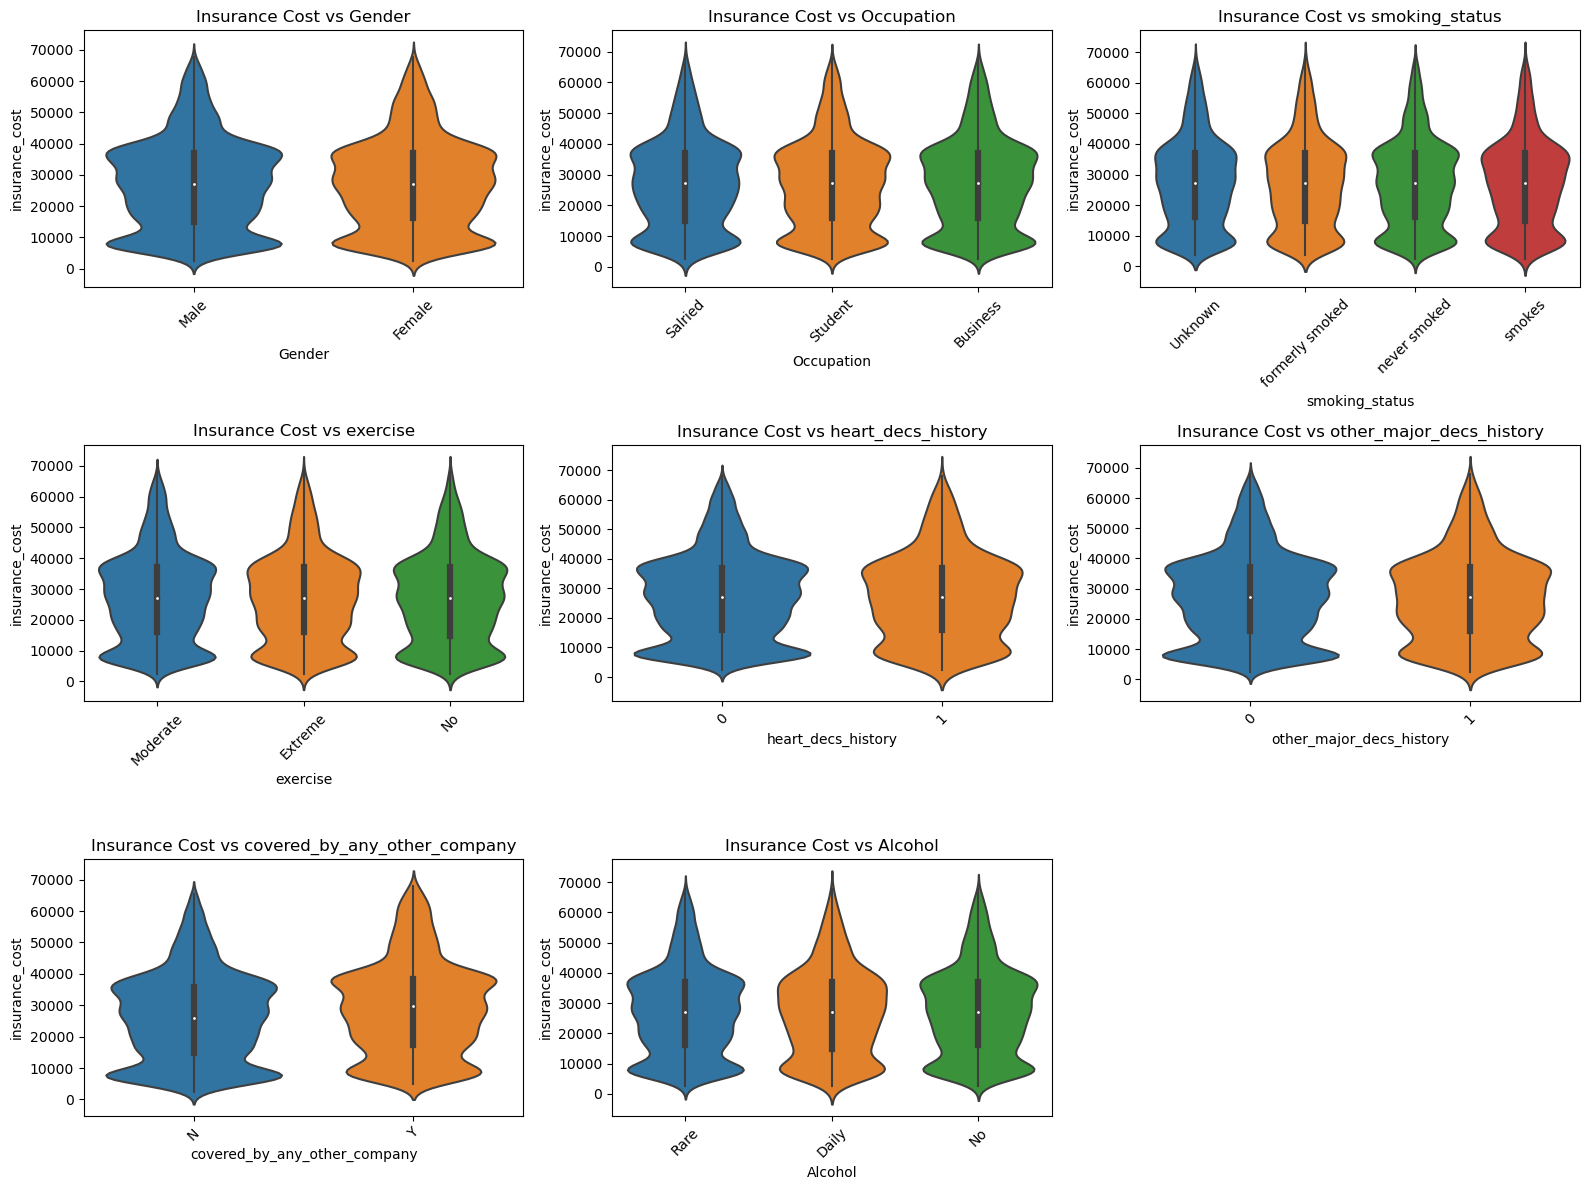

In [14]:
plt.figure(figsize=(16, 12))

for i, cat_var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x=cat_var, y='insurance_cost')
    plt.title(f'Insurance Cost vs {cat_var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Explanation:

Violin Plots: Violin plots provide a similar view as box plots but also show the distribution density of the data. They can be helpful in showing multi-modal distributions (cases where there might be more than one peak in the data).

### Bivariate Analysis for Categorical Variables
- To analyze relationships between two categorical variables (such as Gender and smoking_status), we use a cross-tabulation along with heatmaps or stacked bar plots.

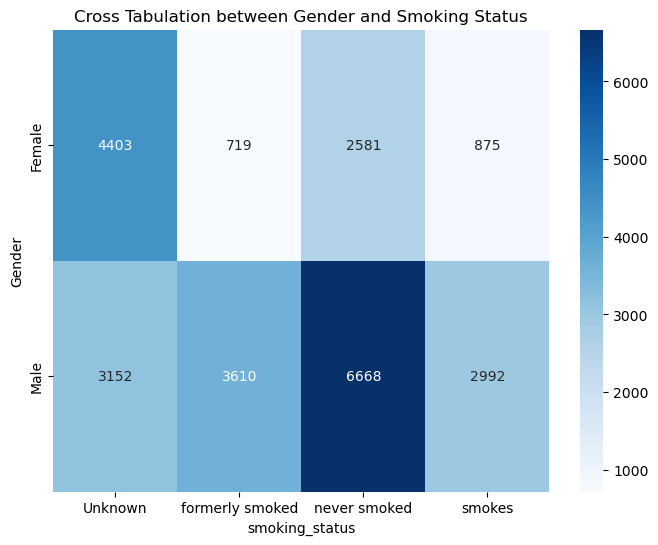

In [15]:
# Cross-tabulation between two categorical variables
cross_tab = pd.crosstab(df['Gender'], df['smoking_status'])

# Plot heatmap of the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Cross Tabulation between Gender and Smoking Status')
plt.show()


- Explanation:

  Cross-Tabulation and Heatmap: Cross-tabulation allows us to count how often certain combinations of categorical variables occur. 
  For example:
  
  We can see how many male vs. female customers are smokers, non-smokers, or former smokers. The male customers are more who smokes compared to the female
  The heatmap makes it easier to visualize the frequency of these combinations.

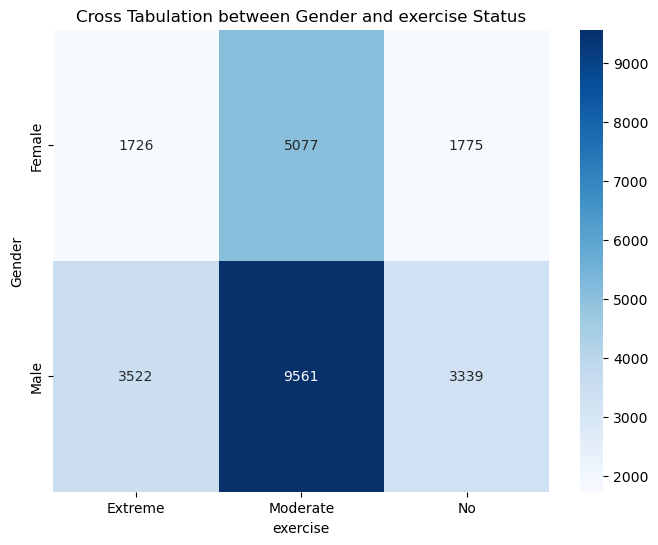

In [16]:
# Cross-tabulation between two categorical variables
cross_tab = pd.crosstab(df['Gender'], df['exercise'])

# Plot heatmap of the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Cross Tabulation between Gender and exercise Status')
plt.show()

- We can see moderate exercise and extreme exercise is done mostly by male customers compared to female customers.
- We can also see completely no exercise is mostly done by male customers comopared to female customers.

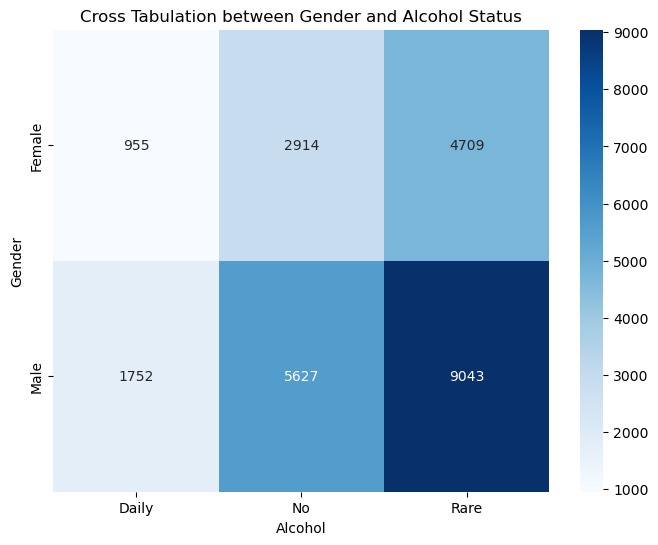

In [17]:
# Cross-tabulation between two categorical variables
cross_tab = pd.crosstab(df['Gender'], df['Alcohol'])

# Plot heatmap of the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Cross Tabulation between Gender and Alcohol Status')
plt.show()

- We can see Daily Alcohol is mostly consumed by male customers than female customers. Rarely and no consuming alcohol is also more in male customers comapred to female customers.

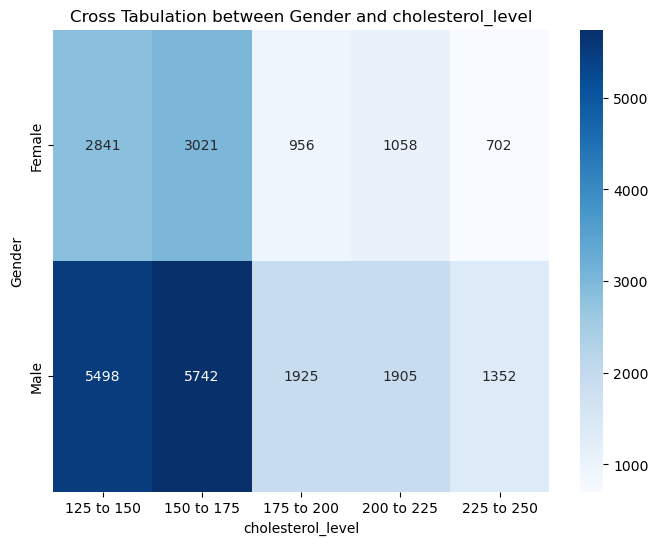

In [18]:
# Cross-tabulation between two categorical variables
cross_tab = pd.crosstab(df['Gender'], df['cholesterol_level'])

# Plot heatmap of the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Cross Tabulation between Gender and cholesterol_level')
plt.show()

- We can see normal cholesterol level are in both male and female customers. 
- But high cholesterol level are more in male customers than in female customers.

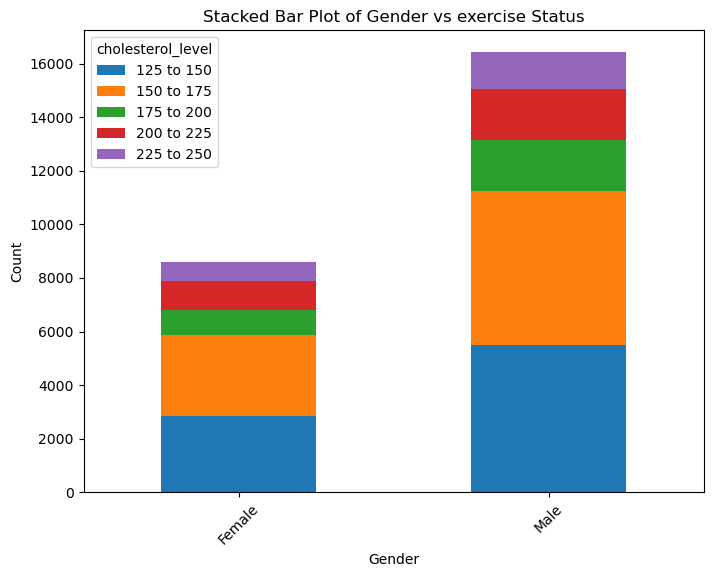

In [19]:
# Plot stacked bar plot for two categorical variables
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Plot of Gender vs exercise Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- Stacked Bar Plot: This plot shows the distribution of one categorical variable across another. For example:
  We can see the proportion of smokers, non-smokers, and former smokers for both males and females.

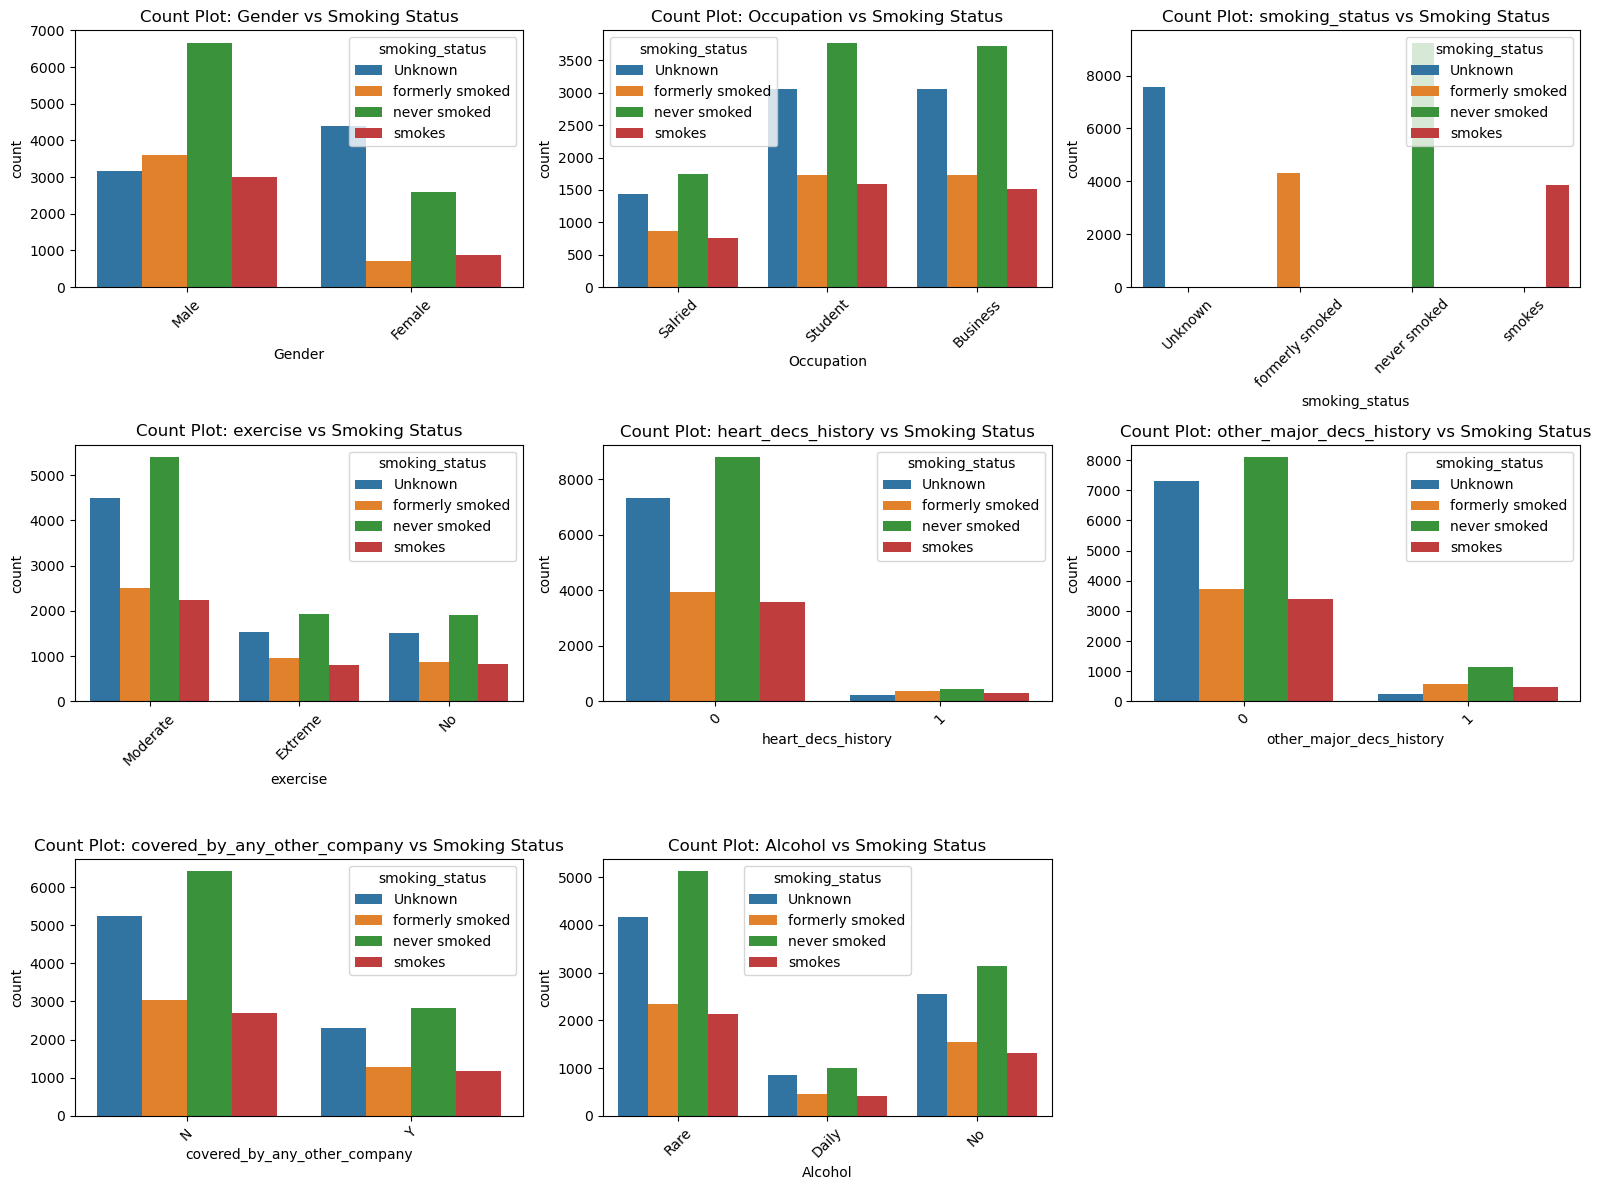

In [20]:
# Plot count plot for all categorical variables against one another
plt.figure(figsize=(16, 12))

for i, cat_var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=cat_var, hue='smoking_status')
    plt.title(f'Count Plot: {cat_var} vs Smoking Status')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Count Plots: For each categorical variable (e.g., Gender, Occupation, etc.), this plot shows the count distribution across different Smoking Status categories. For example:

  We can see  more males are never smoked compared to females and there are more of unknown in female customers.
  
  We can observe Business and student customers smoke more than salaried.
  
  we can see customers doing moderate exercise smokes more than customers doing extreme or no exercise.
  
  we can see customers not having heart disease have never smoked comparatively to customers who have smoked.
  
  We can see customers not having other major disease history have never smoked or unknown compared to formerly smoked or smoked.
  
  We can see customers not covered by any other company smokes the most.
  
  We can see customers who rarely drink or dont drink smokes more than customers daily having alcohol.

### Bivariate Analysis for Continuous Variables
- We’ll use scatter plots and correlation heatmaps to examine the relationships between pairs of continuous variables.


- Scatter Plot:

  Scatter plots are useful to see the linear relationship between two continuous variables.
  
- Correlation Heatmap:

  Correlation is a measure of the linear relationship between two variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

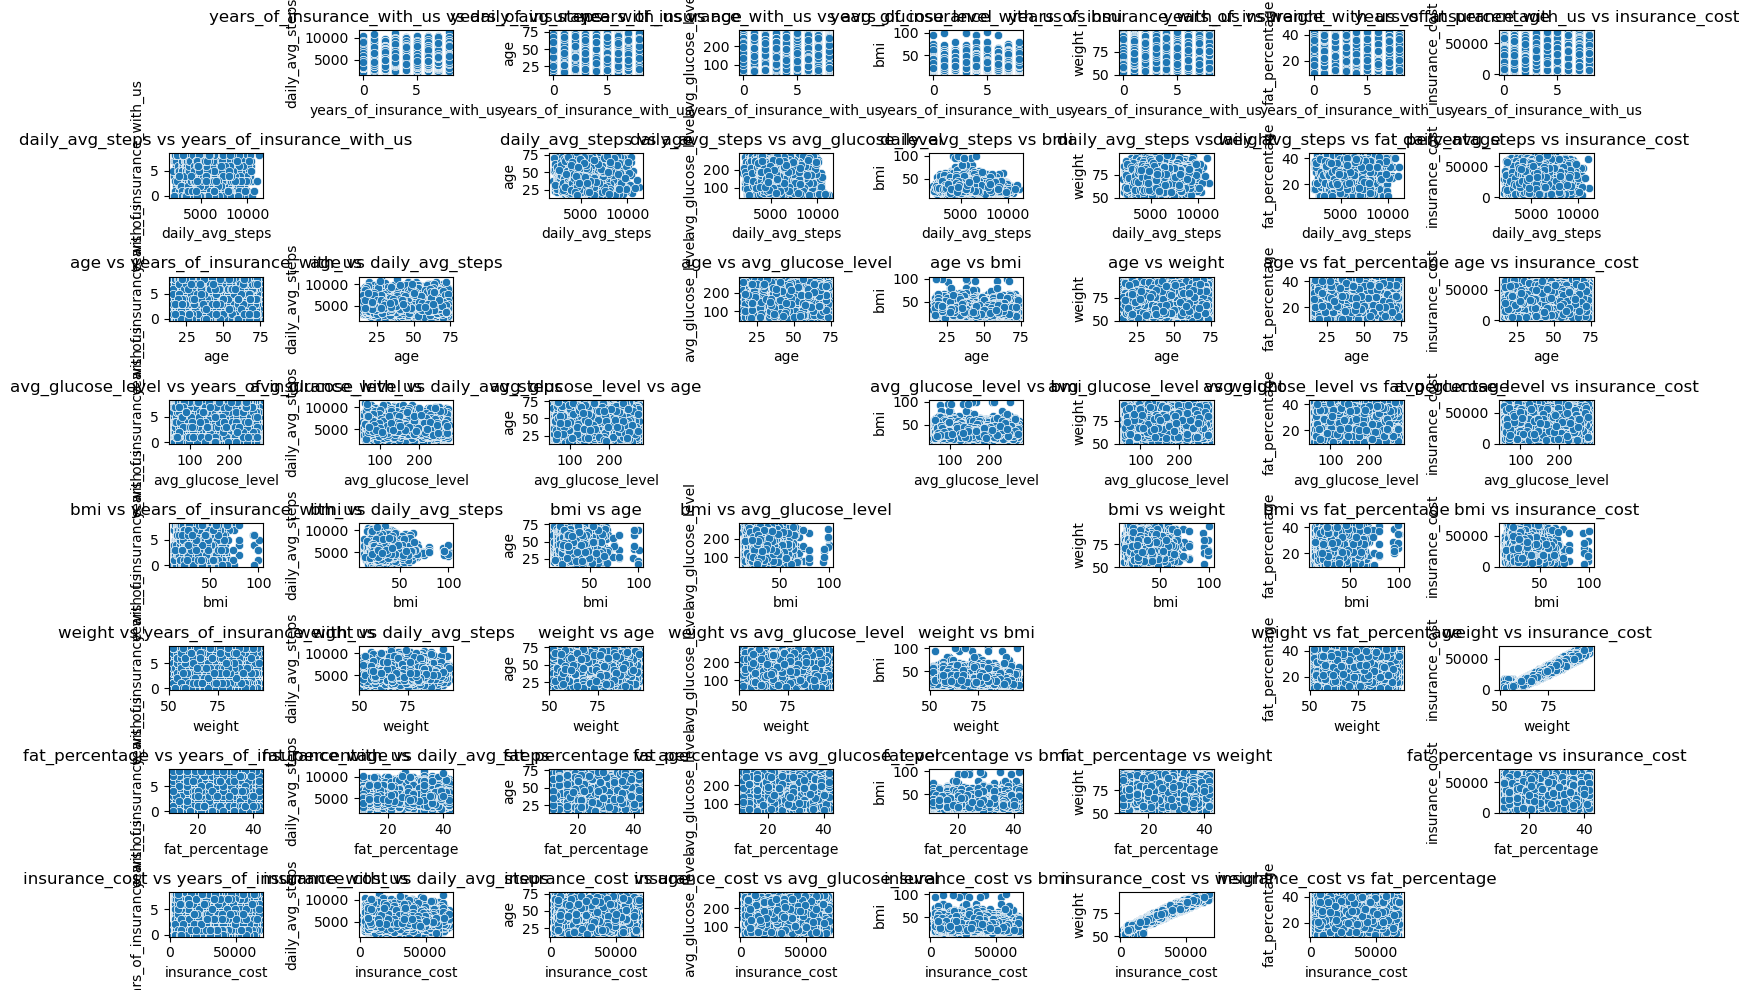

In [21]:
# List of continuous variables
continuous_vars = ['years_of_insurance_with_us', 'daily_avg_steps',
                   'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']

# Plot scatter plots for pairs of continuous variables
plt.figure(figsize=(15, 10))

for i, var1 in enumerate(continuous_vars):
    for j, var2 in enumerate(continuous_vars):
        if var1 != var2:  # Avoid plotting the same variables against each other
            plt.subplot(len(continuous_vars), len(continuous_vars), i*len(continuous_vars) + j + 1)
            sns.scatterplot(x=df[var1], y=df[var2])
            plt.title(f'{var1} vs {var2}')

plt.tight_layout()
plt.show()


#### Explanation:
- Scatter Plot: The scatter plot shows how two continuous variables interact with each other. 

  For example:
  
  age vs insurance_cost: This might reveal how age affects insurance cost. Higher the age higher will be the insurance cost for customers as they are more prone to getting sick.
  
  bmi vs insurance_cost: We might see if customers with higher BMI have higher insurance costs as they have high risk of attracting diseases.

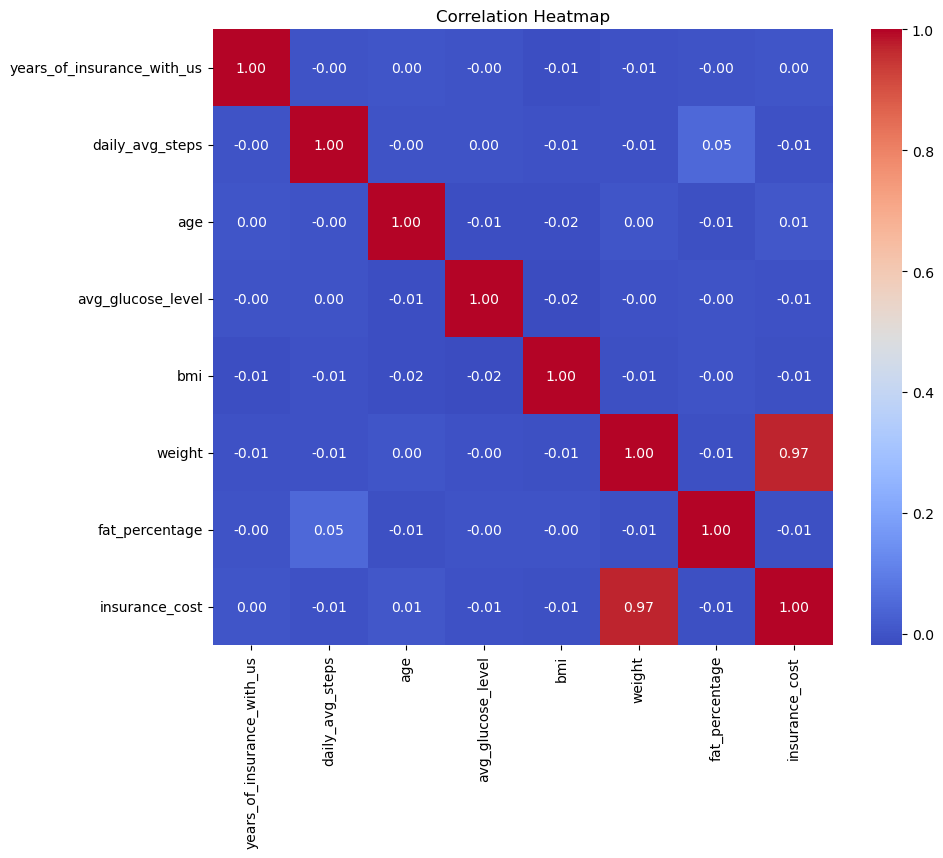

In [22]:
# Compute the correlation matrix for continuous variables
corr_matrix = df[continuous_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#### Explanation:
- Correlation Heatmap: This will give us an overview of how strongly the continuous variables are correlated with one another.

For example:

If the correlation between bmi and insurance_cost is high (closer to 1), this indicates a strong positive relationship: higher BMI leads to higher insurance costs.

If the correlation between age and daily_avg_steps is negative, it suggests that older customers tend to walk fewer steps on average.

#### Key Insights from Bivariate Analysis

- Box Plots:

Insurance Cost vs Smoking Status: If smokers tend to have higher insurance costs, it could be due to the increased health risks associated with smoking.
Insurance Cost vs Gender: If one gender has consistently higher insurance costs, this could indicate a pricing model based on gender-related health risks.

- Cross-Tabulation (Categorical Variables):

Gender vs Smoking Status: This might show that more males are smokers compared to females, which could influence the insurance pricing strategy for smokers.

- Correlation Heatmap:

The correlation between age and insurance_cost might be positive, meaning older customers have higher insurance costs.
If cholesterol_level and bmi are strongly correlated, it suggests that customers with higher BMI also tend to have higher cholesterol.

### c) Removal of unwanted variables (if applicable)

To remove unwanted variables from the dataset, we first need to identify which variables are unnecessary or redundant for our analysis or model-building process. This step helps in reducing the dimensionality of the dataset, avoiding noise, and improving model performance.

#### Identifying Unwanted Variables

Unwanted variables can be identified based on the following criteria:

Irrelevance: Variables that have little to no relevance to the problem or the target variable.

Redundancy: Variables that duplicate the information provided by others (e.g., duplicates, highly correlated variables).

Data Integrity: Variables that contain too many missing values or irrelevant data points.

Domain Knowledge: Variables that are not useful based on domain-specific insights.

For example, the following types of variables may be candidates for removal:

Unique identifiers (e.g., applicant_id) that do not add predictive power.

Variables with a high percentage of missing values or low variance (e.g., constants).

Highly correlated variables with each other, as they introduce multicollinearity.

##### Identifying Potentially Unwanted Variables
Based on the dataset some variables may be considered for removal:

- applicant_id: Unique identifier; typically not useful for modeling.

- Location: If the location of the hospital has little to no relevance to insurance cost.

- Year_last_admitted: If this is not directly relevant to predicting insurance cost.

Also, let’s check for:

Columns with too many missing values.

Columns with low variance.

#### Removing Unwanted Variables

Based on our insights, we can now remove irrelevant or redundant variables from the dataset. We've decided to remove:

- applicant_id (unique identifier),
- Location (irrelevant),
- Year_last_admitted (if irrelevant),
- Columns with low variance (if any).

In [23]:
# Dropping unwanted columns
columns_to_drop = ['applicant_id', 'Location', 'Year_last_admitted']  # Add or remove as per analysis
df_cleaned = df.drop(columns=columns_to_drop)

# Verifying if the columns are dropped
df_cleaned.head()


,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,avg_glucose_level,bmi,smoking_status,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salried,2,125 to 150,4866,28,1,0,...,97,31.2,Unknown,67,N,Rare,Moderate,1,25,20978
1,0,0,0,Student,4,150 to 175,6411,50,0,0,...,212,34.2,formerly smoked,58,N,Rare,Moderate,3,27,6170
2,1,0,0,Business,4,200 to 225,4509,68,0,0,...,166,40.4,formerly smoked,73,N,Daily,Extreme,0,32,28382
3,7,4,0,Business,2,175 to 200,6214,51,0,0,...,109,22.9,Unknown,71,Y,Rare,No,3,37,27148
4,3,1,0,Student,2,150 to 175,4938,44,0,1,...,118,26.5,never smoked,74,N,No,Extreme,0,34,29616


#### Explanation:

  drop(): Removes the specified columns from the dataset.
  
  columns_to_drop: Contains the list of column names that are considered irrelevant for the analysis.

##### Conclusion

By following this approach, we:

- Checked for missing values and columns with low variance to remove irrelevant features.

- Dropped columns that were deemed unnecessary for our analysis.

- This cleaning and feature selection process will ensure that only relevant and meaningful features are used in your model, improving its performance and reducing noise.

### d) Missing Value treatment (if applicable)

Missing value treatment is a crucial step in data preprocessing, as missing values can lead to biased or inaccurate models. There are various methods to handle missing data based on the nature of the data and the amount of missing values.

- Identify Missing Values

  First, we need to identify the missing values in each column and understand their distribution.

In [24]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values and their count
print("Columns with missing values:\n", missing_values[missing_values > 0])

# Percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:\n", missing_percentage[missing_percentage > 0])


Columns with missing values:
 bmi                     990
Year_last_admitted    11881
dtype: int64
Percentage of missing values in each column:
 bmi                    3.960
Year_last_admitted    47.524
dtype: float64


##### There are missing values in bmi and Year_last_admitted.
      bmi has 3 % data missing and  Year_last_admitted has 47% of data missing.

- Handling Missing Values

  Imputing Missing Values

For columns with fewer missing values, we can impute the missing values based on the variable type (numerical or categorical).

- Imputing Missing Values for Numerical Columns: Use the mean, median, or other statistical techniques.

In [25]:
# Fill missing numerical columns with the median of the column
df_cleaned['bmi'].fillna(df_cleaned['bmi'].median(), inplace=True)

- Verify the Changes

  After imputing or dropping missing values, we should verify that there are no missing values left in the dataset.

In [26]:
# Verify if missing values still exist
missing_values_after_treatment = df_cleaned.isnull().sum()
print("Missing values after treatment:\n", missing_values_after_treatment[missing_values_after_treatment > 0])


Missing values after treatment:
 Series([], dtype: int64)


In [27]:
# Checking for missing values
missing_values = df_cleaned.isnull().sum().sort_values(ascending=False)
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 years_of_insurance_with_us        0
avg_glucose_level                 0
fat_percentage                    0
weight_change_in_last_one_year    0
exercise                          0
Alcohol                           0
covered_by_any_other_company      0
weight                            0
smoking_status                    0
bmi                               0
Gender                            0
regular_checkup_lasy_year         0
other_major_decs_history          0
heart_decs_history                0
age                               0
daily_avg_steps                   0
cholesterol_level                 0
visited_doctor_last_1_year        0
Occupation                        0
adventure_sports                  0
insurance_cost                    0
dtype: int64


- After treating the missing values we can see there are now no missing values in the dataset.

#### Explanation:
Identifying Missing Data: We first check for missing values in the dataset and calculate the percentage.

Treating Missing Data: Based on the missing values and their percentage, we either drop rows/columns or impute values using statistical methods (mean, median for numerical data, mode for categorical data).

Verification: After treatment, we check to ensure no missing data remains.

By handling missing values appropriately, we can ensure that the data is clean and ready for analysis or modeling.

### e) Outlier treatment (if required)

Outlier treatment is a crucial step in data preprocessing, as extreme values can distort statistical analyses and model performance. Depending on the dataset and its characteristics, outliers can be handled in different ways. Let's go through the steps to detect and treat outliers for the continuous variables in the dataset.

- Identify Outliers

There are several methods to identify outliers. The most common are:

- Boxplots: A graphical method to visualize outliers.

- Z-Score Method: Outliers are identified by calculating how far each data point is from the mean in terms of standard deviations.

- Interquartile Range (IQR) Method: This method identifies outliers based on the range between the first quartile (Q1) and third quartile (Q3).

- Boxplot to Visualize Outliers

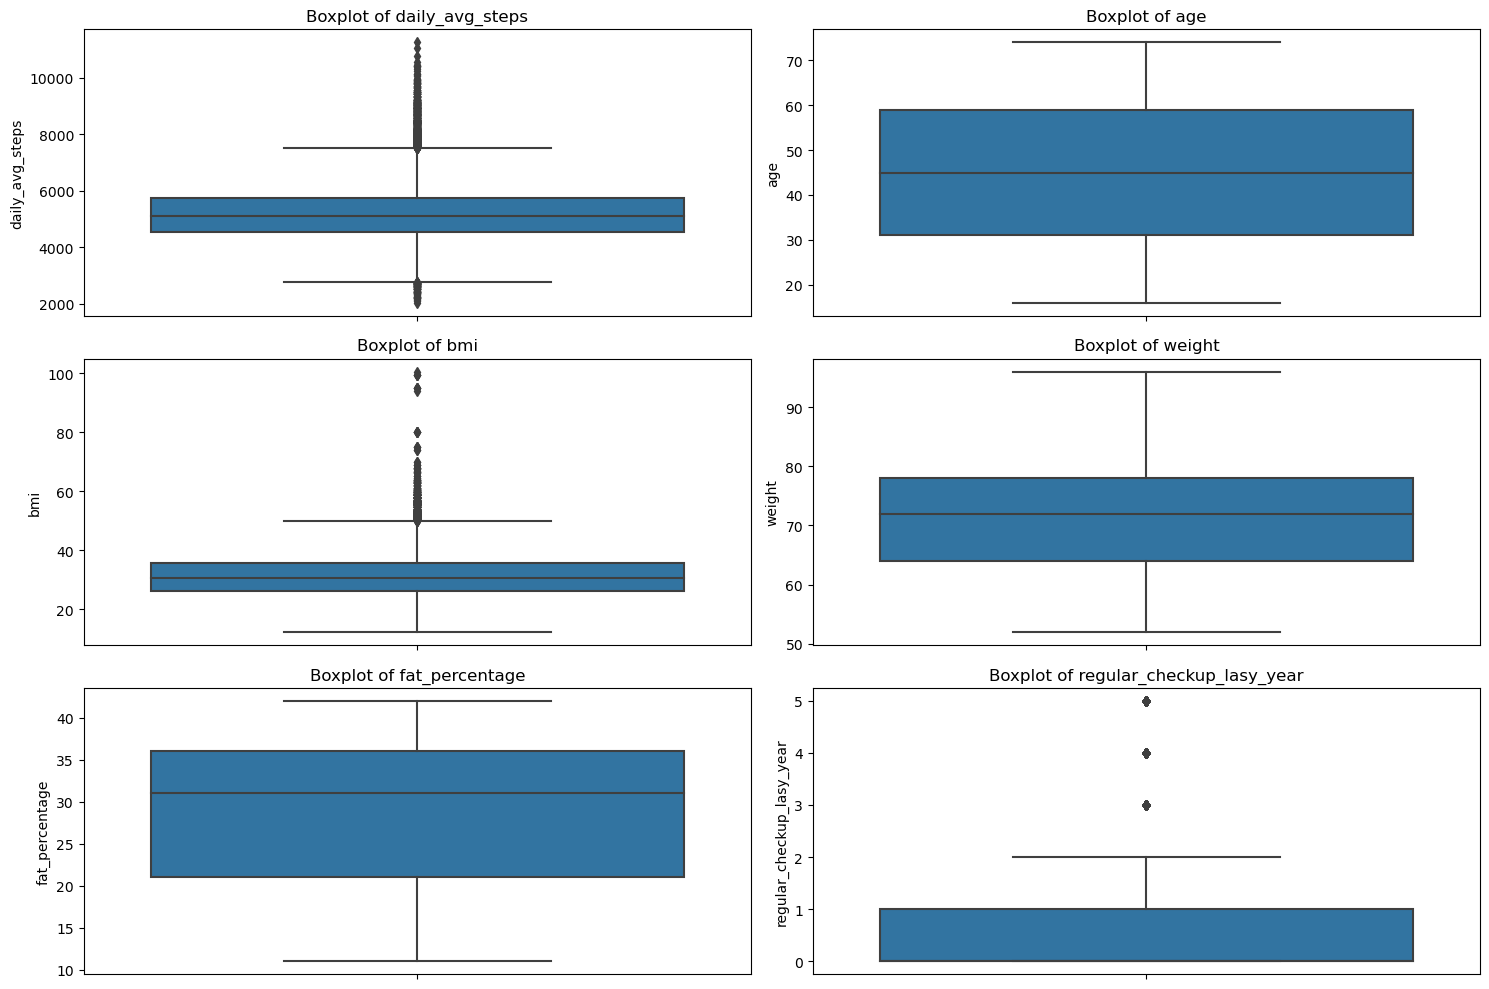

In [28]:

# List of continuous variables to check for outliers
continuous_vars = [ 'daily_avg_steps', 'age', 'bmi', 'weight', 'fat_percentage','regular_checkup_lasy_year']

# Create boxplots for each continuous variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()


 Boxplots: The whiskers represent the data within 1.5 times the interquartile range (IQR). Any points beyond the whiskers are considered potential outliers.

-  Z-Score Method

   The Z-score method is used to detect outliers by calculating how many standard deviations each data point is from the mean.

In [29]:
from scipy import stats

# Z-score calculation for outlier detection
z_scores = stats.zscore(df[continuous_vars])

# Identify the rows with Z-scores greater than 3 or less than -3 (common threshold for outliers)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Check how many outliers were detected
print("Outliers detected using Z-Score method:\n", outliers_zscore.sum(axis=0))


Outliers detected using Z-Score method:
 daily_avg_steps              344
age                            0
bmi                            0
weight                         0
fat_percentage                 0
regular_checkup_lasy_year    348
dtype: int64


Z-Score Method: A Z-score above 3 or below -3 is often considered an outlier, but the threshold can be adjusted depending on the dataset.

- Interquartile Range (IQR) Method

IQR method detects outliers by calculating the difference between the 1st quartile (Q1) and 3rd quartile (Q3). Data points outside 1.5 times the IQR from Q1 or Q3 are considered outliers.

In [30]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply IQR method on continuous variables
for var in continuous_vars:
    outliers = detect_outliers_iqr(df, var)
    print(f'Number of outliers in {var}:', len(outliers))


Number of outliers in daily_avg_steps: 952
Number of outliers in age: 0
Number of outliers in bmi: 549
Number of outliers in weight: 0
Number of outliers in fat_percentage: 0
Number of outliers in regular_checkup_lasy_year: 2943


IQR Method: Detects values that are outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], which are considered outliers.

#### Treat Outliers

- Capping and Flooring

  In this method, the outliers are replaced with the nearest non-outlier values (i.e., the lower or upper bound of the acceptable range).

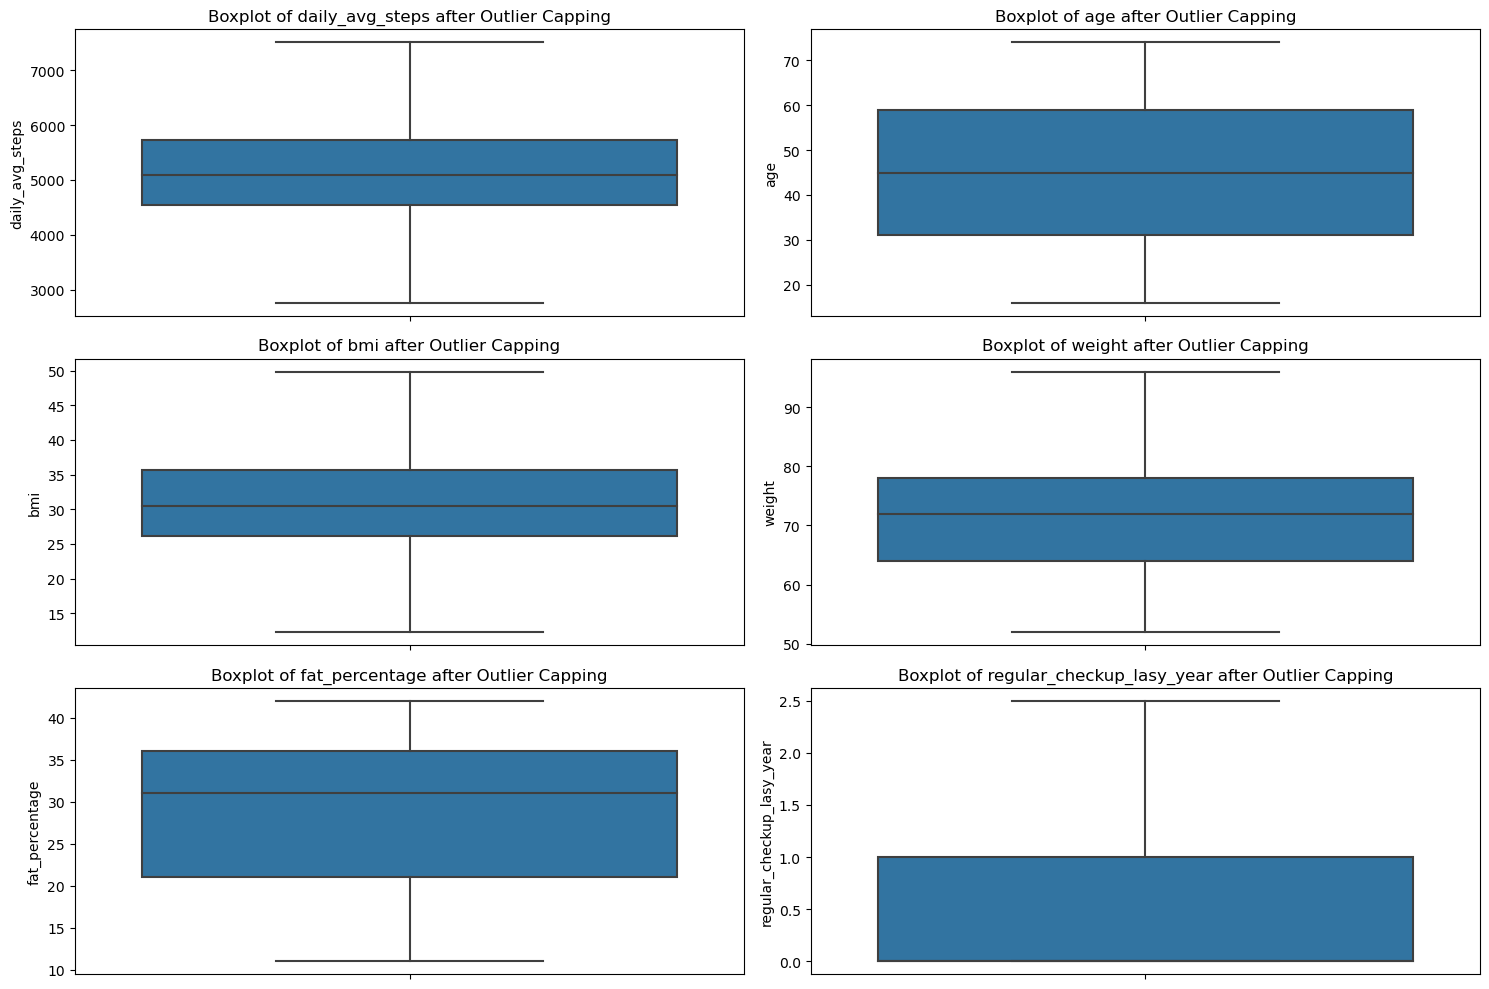

In [31]:
# Function to cap outliers based on IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Apply capping to continuous variables
for var in continuous_vars:
    cap_outliers(df, var)

# Verify the changes with a boxplot
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot of {var} after Outlier Capping')
plt.tight_layout()
plt.show()


Capping/Flooring: The outliers are replaced with the values at the boundaries of the IQR range, thus reducing their impact while keeping the data intact.

- Verify the Results

   After treating the outliers, it’s important to verify that the outliers have been successfully removed or capped.

In [32]:
# Verify if any outliers remain in the dataset after treatment
for var in continuous_vars:
    outliers_remaining = detect_outliers_iqr(df, var)
    print(f'Remaining outliers in {var} after treatment: {len(outliers_remaining)}')


Remaining outliers in daily_avg_steps after treatment: 0
Remaining outliers in age after treatment: 0
Remaining outliers in bmi after treatment: 0
Remaining outliers in weight after treatment: 0
Remaining outliers in fat_percentage after treatment: 0
Remaining outliers in regular_checkup_lasy_year after treatment: 0


- All the outliers are removed now.

### f) Variable transformation (if applicable)

To perform variable transformation on a dataset and handle categorical and numerical variables effectively, we'll need to address these common techniques:

- One-Hot Encoding: Converts categorical variables into binary columns for each category.
- Label Encoding: Assigns a numerical label to each category.
- Scaling: Rescales the numerical variables to ensure they are on a similar scale.
- Normalization: Rescales numerical variables to a range of [0, 1].
- Feature Engineering: Create new features from existing ones to enhance model performance.

- One-Hot Encoding

  One-Hot Encoding is used for categorical variables with multiple categories. It creates new columns for each category and assigns 0 or 1 based on whether the category applies to the given observation.

In [33]:

# One-Hot Encoding for 'Gender', 'smoking_status', 'exercise', and 'covered_by_any_other_company'
df_onehot = pd.get_dummies(df_cleaned, columns=['Occupation','cholesterol_level','Gender', 'smoking_status', 'exercise', 'covered_by_any_other_company','Alcohol'], drop_first=True)

# Check the transformed dataframe
print(df_onehot.head())


   years_of_insurance_with_us  regular_checkup_lasy_year  adventure_sports  \
0                           3                          1                 1   
1                           0                          0                 0   
2                           1                          0                 0   
3                           7                          4                 0   
4                           3                          1                 0   

   visited_doctor_last_1_year  daily_avg_steps  age  heart_decs_history  \
0                           2             4866   28                   1   
1                           4             6411   50                   0   
2                           4             4509   68                   0   
3                           2             6214   51                   0   
4                           2             4938   44                   0   

   other_major_decs_history  avg_glucose_level   bmi  ...  \
0                  

Explanation:
pd.get_dummies() is used for one-hot encoding.
drop_first=True avoids the dummy variable trap by dropping one of the categories.

- Label Encoding

  Label Encoding assigns a unique integer label to each category. This is useful when dealing with categorical variables that have an ordinal relationship, like "low", "medium", and "high."

In [34]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()


df_cleaned['Occupation_encoded'] = label_encoder.fit_transform(df['Occupation'])
df_cleaned['cholesterol_level_encoded'] = label_encoder.fit_transform(df['cholesterol_level'])
df_cleaned['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df_cleaned['smoking_status_encoded'] = label_encoder.fit_transform(df['smoking_status'])
df_cleaned['covered_by_any_other_company_encoded'] = label_encoder.fit_transform(df['covered_by_any_other_company'])
df_cleaned['Alcohol_encoded'] = label_encoder.fit_transform(df['Alcohol'])
df_cleaned['exercise_encoded'] = label_encoder.fit_transform(df['exercise'])

# Check the transformed dataframe
print(df_cleaned[['Occupation', 'Occupation_encoded']].head())
print(df_cleaned[['cholesterol_level', 'cholesterol_level_encoded']].head())
print(df_cleaned[['Gender','Gender_encoded']].head())
print(df_cleaned[['smoking_status','smoking_status_encoded']].head())
print(df_cleaned[['covered_by_any_other_company','covered_by_any_other_company_encoded']].head())
print(df_cleaned[['Alcohol', 'Alcohol_encoded']].head())
print(df_cleaned[['exercise', 'exercise_encoded']].head())



  Occupation  Occupation_encoded
0    Salried                   1
1    Student                   2
2   Business                   0
3   Business                   0
4    Student                   2
  cholesterol_level  cholesterol_level_encoded
0        125 to 150                          0
1        150 to 175                          1
2        200 to 225                          3
3        175 to 200                          2
4        150 to 175                          1
   Gender  Gender_encoded
0    Male               1
1    Male               1
2  Female               0
3  Female               0
4    Male               1
    smoking_status  smoking_status_encoded
0          Unknown                       0
1  formerly smoked                       1
2  formerly smoked                       1
3          Unknown                       0
4     never smoked                       2
  covered_by_any_other_company  covered_by_any_other_company_encoded
0                            N       

- Scaling

  Scaling rescales the numerical variables so they fall into a similar range. Standard Scaling (Z-Score) or Min-Max Scaling are two popular methods.

In [35]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Apply scaling to the continuous variables
df_cleaned[['bmi', 'weight', 'age','avg_glucose_level','fat_percentage']] = scaler.fit_transform(df_cleaned[['bmi', 'weight', 'age', 'avg_glucose_level','fat_percentage']])

# Check the scaled values
print(df_cleaned[['bmi', 'weight', 'age', 'avg_glucose_level','fat_percentage']].head())


        bmi    weight       age  avg_glucose_level  fat_percentage
0 -0.020458 -0.494422 -1.050360          -1.124370       -0.441634
1  0.368102 -1.459569  0.315492           0.708929       -0.209944
2  1.171127  0.149010  1.433007          -0.024391        0.369282
3 -1.095475 -0.065467  0.377576          -0.933069        0.948508
4 -0.629202  0.256249 -0.057013          -0.789594        0.600972


StandardScaler transforms the data so that the mean is 0 and the standard deviation is 1.

This method is ideal for algorithms that rely on distances between data points, like k-NN or SVM.

- Normalization

  Normalization (Min-Max Scaling) brings all variables to a fixed range, typically [0, 1]. It's especially useful for neural networks or models sensitive to the magnitude of data.

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max Scaler object
minmax_scaler = MinMaxScaler()

# Apply normalization to continuous variables
df_cleaned[['bmi', 'weight', 'avg_glucose_level','fat_percentage']] = minmax_scaler.fit_transform(df_cleaned[['bmi', 'weight', 'avg_glucose_level','fat_percentage']])

# Check the normalized values
print(df_cleaned[['bmi', 'weight', 'avg_glucose_level','fat_percentage']].head())


        bmi    weight  avg_glucose_level  fat_percentage
0  0.214043  0.340909           0.181818        0.451613
1  0.248018  0.136364           0.704545        0.516129
2  0.318233  0.477273           0.495455        0.677419
3  0.120045  0.431818           0.236364        0.838710
4  0.160815  0.500000           0.277273        0.741935


MinMaxScaler transforms features to a given range (by default [0, 1]).

Use normalization when your model benefits from bounded values, like in deep learning models.


- Conclusion

  By applying variable transformation techniques, we can ensure that the data is prepared in the most suitable form for machine learning algorithms. These techniques, from encoding to scaling and feature engineering, are critical steps in the model development process and can significantly impact the model's performance.

### g) Addition of new variables (if required)

- Im planning not to add any new variables as the dataset given to us is sufficient enough to solve the business problem.

### 4) Business insights from EDA 

   a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

#### Balanced data 

Balanced data refers to a dataset where all target classes or categories are represented approximately equally, or where the distribution of continuous target values is reasonably spread out across the possible range.

- Balanced Data in Classification
In a classification problem, the dataset is considered balanced when each class has a similar number of instances. This means no class dominates the dataset, and each class is well-represented.

Example of Balanced Data in Classification:
Imagine you're building a model to classify whether a customer will renew their insurance (class "Yes") or not (class "No"). If you have:

500 customers who renewed ("Yes")
480 customers who did not renew ("No")
This would be considered balanced data because the number of instances in each class is roughly equal.

Importance of Balanced Data in Classification:
Balanced data ensures that the machine learning model doesn’t become biased toward predicting the majority class. If one class significantly outnumbers the others, the model may focus on predicting that majority class to maximize overall accuracy, while performing poorly on the minority class.

- Balanced Data in Regression
For a continuous target variable (regression tasks), balanced data means the values of the target variable are spread across a reasonable range without heavy clustering at a particular value or range.

Example of Balanced Data in Regression:
If you are predicting insurance costs, a dataset would be balanced if the costs are well-distributed between low, medium, and high values. For example:

100 customers with low insurance costs (e.g., $100 - $500)
90 customers with medium insurance costs (e.g., $500 - $2,000)
110 customers with high insurance costs (e.g., $2,000 - $10,000)
In this scenario, there’s no overwhelming concentration of data points in one cost range, making the dataset balanced.

Importance of Balanced Data in Regression:
In regression, a balanced distribution of the target variable helps the model understand relationships across the entire value range. If the data is heavily skewed toward one end, the model might struggle to accurately predict values at the other end.


Why is Balanced Data Important?

Balanced data ensures:

Fair model performance: The model can learn patterns for all classes or value ranges equally.
Better evaluation: Balanced data helps you evaluate model performance more accurately, without misleading metrics like high accuracy that might be due to class imbalance.
Reduced bias: The model doesn’t disproportionately favor the majority class or common value range, leading to more reliable predictions for all categories or ranges.
In summary, balanced data provides an equitable representation of all classes or value ranges, ensuring that machine learning models are more accurate, fair, and reliable across the entire dataset.

#### Unbalanced data

Unbalanced data refers to a dataset in which the classes or target values are unequally represented, meaning that one class or a small range of values dominates the dataset. This imbalance can cause significant problems in machine learning models, particularly in classification tasks but also in regression problems.

- Unbalanced Data in Classification
In a classification problem, unbalanced data occurs when the number of instances for one class far exceeds the number of instances for other classes.

Example of Unbalanced Data in Classification:
Consider you are building a model to predict whether a customer will churn (class "Yes") or not churn (class "No"). If you have:

950 customers who did not churn ("No")
50 customers who churned ("Yes")
This would be an unbalanced dataset because the "No" class dominates the dataset (95% of the data), while the "Yes" class only represents 5% of the data.

Problems Caused by Unbalanced Data in Classification:
Bias toward the majority class: Machine learning models tend to focus on the majority class, as it's more common in the training data. This can lead to high accuracy when predicting the majority class but poor performance on the minority class.

Misleading evaluation metrics: Accuracy can be deceptive in unbalanced data. For example, if 95% of the customers did not churn, a model predicting "No" all the time would have 95% accuracy, but it would completely fail at identifying churners.

In such cases, accuracy is not a good metric. Instead, metrics like precision, recall, and F1-score are more appropriate.

- Unbalanced Data in Regression
In regression tasks, unbalanced data means the target variable's values are clustered around certain ranges rather than being spread evenly across the possible range.

Example of Unbalanced Data in Regression:
If you are predicting insurance costs and the majority of your customers have costs between $100 and $500, with very few in higher cost ranges (e.g., $2,000 and above), your dataset is unbalanced.

Problems Caused by Unbalanced Data in Regression:
Poor generalization: The model may struggle to predict values in the underrepresented (minority) ranges. It may perform well on the majority range but poorly on higher or lower cost estimates that are less frequent in the training data.
Bias in predictions: If the majority of data points are in a low cost range, the model may favor predicting low values, even when the actual cost might be high for some instances.

#### Evaluation Metrics for Unbalanced Data

In cases of unbalanced data, For classification problems it's essential to use evaluation metrics that provide more insight into model performance:

- Precision: The proportion of correctly predicted positive instances to all predicted positive instances.

- Recall (Sensitivity): The proportion of actual positive instances that were correctly identified by the model.

- F1-score: The harmonic mean of precision and recall, providing a balanced metric for imbalanced datasets.

- ROC-AUC: Measures how well the model distinguishes between classes, regardless of imbalance.


For regression problems with unbalanced data, you can use metrics such as:

- Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to evaluate the overall accuracy of predictions.

- Focus on how well the model performs across different ranges (low, medium, high) to ensure it's not biased toward common values.

To check if the data is unbalanced, we will examine the distribution of the target variable in your dataset. In unbalanced datasets, one class significantly outnumbers the other class(es). This imbalance can lead to issues during model training, as the model may become biased toward predicting the majority class.

- Identify the Target Variable

The target variable is the column in the dataset that you are trying to predict. In this dataset it is related to insurance cost.

For this step, identifying the specific target variable in the dataset. Our target variable is named insurance_cost.

- Inspect the Distribution of the Target Variable

Next, we will check the distribution of the target variable to determine whether the data is balanced or unbalanced.

In [37]:
# Check the distribution of the target variable
target_variable = 'insurance_cost'  # Replace with the actual name of your target variable
target_counts = df_cleaned[target_variable].value_counts()

# Print the counts of each class
print(target_counts)


insurance_cost
7404     1214
38254     977
6170      970
8638      954
37020     869
34552     857
28382     845
35786     827
25914     779
29616     766
30850     743
9872      742
33318     733
39488     727
27148     719
20978     717
32084     677
24680     669
22212     658
17276     644
19744     637
23446     634
18510     615
16042     578
14808     569
40722     474
13574     454
11106     431
41956     389
12340     373
3702      309
43190     265
48126     259
46892     254
44424     253
49360     239
45658     233
50594     199
4936      197
53062     192
51828     177
54296     172
55530     152
59232     140
60466     137
56764     122
57998     113
62934      87
64168      77
61700      70
65402      56
66636      27
67870      17
2468       12
Name: count, dtype: int64


- Visualize the Distribution

It’s easier to visualize whether the data is unbalanced by plotting a bar chart of the target variable distribution.

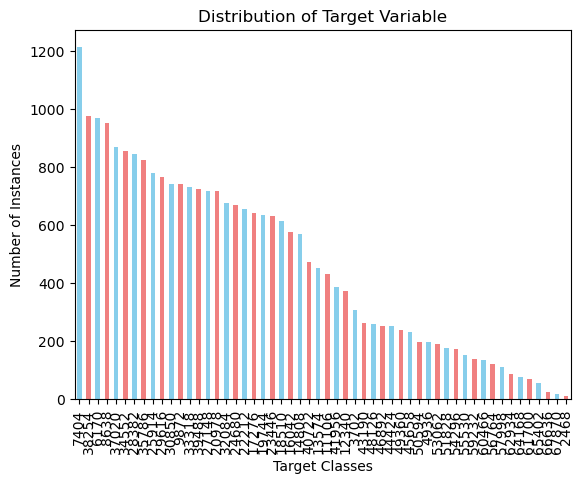

In [38]:
# Plotting the distribution of the target variable
target_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Classes')
plt.ylabel('Number of Instances')
plt.show()


- Interpret the Results

Balanced Dataset: The classes in the target variable are nearly equal in number.

Unbalanced Dataset: One class has significantly more instances than the other.

- This indicates that the data is unbalanced because one target class has significantly more instances than the other target class.

#### Conclusion: What to Do if Data is Unbalanced

If the dataset is unbalanced, here are some common approaches to handle it:

Resampling Techniques:

- Oversampling: Increase the number of instances of the minority class by duplicating examples.
- Undersampling: Reduce the number of instances of the majority class by randomly removing examples.
- SMOTE (Synthetic Minority Over-sampling Technique): Create synthetic samples for the minority class by interpolating between examples.

Use Appropriate Evaluation Metrics: Instead of accuracy (which may be misleading), use metrics such as:

- Precision
- Recall
- F1 Score
- ROC-AUC Score

Class Weighting:

- Many machine learning algorithms allow you to assign weights to different classes to adjust for the imbalance.

#### Business-Specific Solutions

In the insurance business, cost-sensitive solutions can be applied. For example:

Differential Pricing Models: Use the insights from predictive models to adjust premium costs for high-risk individuals. This ensures that the company is compensated for the additional risk posed by such policyholders.

Proactive Health Management: If the model identifies customers with high insurance costs, the company can proactively offer health and wellness programs to help reduce risks, thereby lowering future insurance costs.

- Conclusion
  Handling imbalanced data is crucial in businesses like insurance, where the minority class (high-risk or high-cost customers) is often the focus of prediction. The techniques mentioned above, such as resampling, adjusting class weights, changing evaluation metrics, and using anomaly detection, can significantly improve the performance of models trained on imbalanced datasets.

In the context of this project, by applying these techniques, the insurance company can:

- Reduce financial risk by accurately identifying high-risk customers.
- Optimize insurance premiums based on predictive insights.
- Provide better customer service by offering targeted health programs for high-risk individuals, reducing future claims and costs.

#### b) Any business insights using clustering  (if applicable)

Let's go through the K-Means clustering technique.
K-Means is one of the most commonly used clustering algorithms that partitions the data into K distinct clusters based on the features of the data points. 

Determine the Optimal Number of Clusters

- Before applying K-Means, it's essential to determine the optimal number of clusters (K). One common method to do this is the Elbow Method.

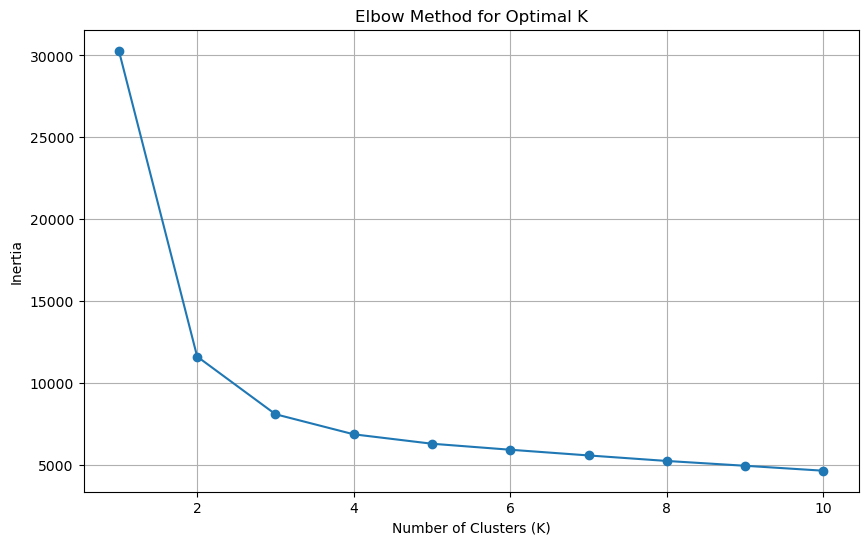

In [39]:
from sklearn.cluster import KMeans


# Elbow Method to determine optimal K
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned[['bmi', 'weight','age', 'avg_glucose_level','fat_percentage']])
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


- Apply K-Means Clustering
  Once we identify the optimal K (let's assume we found K=4), we can apply K-Means clustering.

In [40]:
# Applying KMeans with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(df_cleaned[['bmi', 'weight','age', 'avg_glucose_level','fat_percentage']])

# Display the first few rows of the dataframe with clusters
print(df_cleaned[['bmi', 'weight', 'age','avg_glucose_level','fat_percentage', 'cluster']].head())


        bmi    weight       age  avg_glucose_level  fat_percentage  cluster
0  0.214043  0.340909 -1.050360           0.181818        0.451613        2
1  0.248018  0.136364  0.315492           0.704545        0.516129        0
2  0.318233  0.477273  1.433007           0.495455        0.677419        3
3  0.120045  0.431818  0.377576           0.236364        0.838710        0
4  0.160815  0.500000 -0.057013           0.277273        0.741935        1


- Visualize the Clusters
  After clustering, it's helpful to visualize the clusters to understand how the data is grouped.

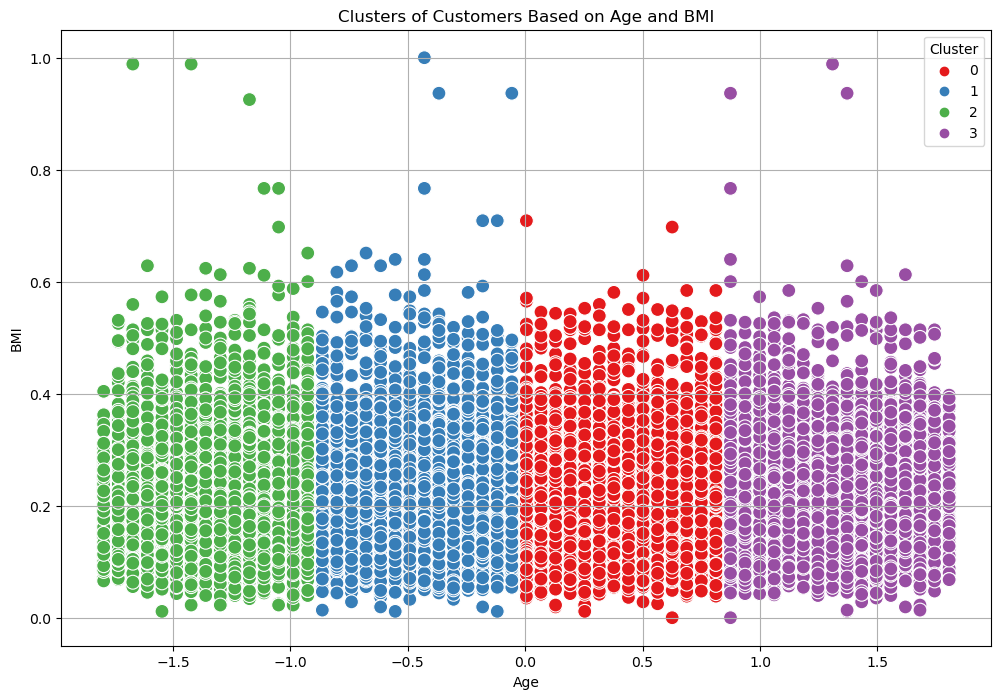

In [41]:
# Visualizing the clusters using a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='bmi', hue='cluster', data=df_cleaned, palette='Set1', s=100)
plt.title('Clusters of Customers Based on Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.grid()
plt.show()


- Analyze the Results

  After visualization, analyze the clusters to derive business insights. You can check the means of the features for each cluster to understand the characteristics of different customer segments.

In [42]:
# Analyzing cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_cleaned[['bmi', 'weight', 'age', 'avg_glucose_level','fat_percentage']].columns)
print("Cluster Centers:\n", cluster_centers_df)


Cluster Centers:
          bmi     weight        age  avg_glucose_level  fat_percentage
0  33.016636  75.742808  51.501285         198.830093       33.778404
1  33.038308  75.739955  37.541952         198.971979       33.733326
2  33.031467  75.795165  23.758661         199.475129       33.825789
3  33.011092  75.789847  65.802985         198.926572       33.755365


Interpret the Clusters

Based on the cluster centers, you can interpret what each cluster represents. For instance:

- Cluster 0:  represent elder individuals with lower glucose levels and BMI.
- Cluster 1:  include younger individuals with lower BMI and glucose levels.
- Cluster 2:  represent younger individuals with high fat percentage
- Cluster 3: represent elder individuals with high fat percentage with lower bmi.

Conclusion

K-Means clustering allows for effective segmentation of customers based on health metrics. The insights derived from this analysis can help tailor insurance products, adjust premiums, and design marketing strategies targeted toward specific customer segments.

- Business Insights

  Cluster Analysis for Health Insurance:

  Cluster 1: Young, physically active individuals with low health risks. The insurance company could offer a low-premium, high-deductible plan that incentivizes preventive care. 

  Cluster 2: Middle-aged individuals with moderate health risks. The company might promote wellness programs and screenings to manage health proactively.

  Cluster 3: Older adults with chronic conditions. The insurer could develop comprehensive coverage options, including chronic disease management services.

# Notes 2

### Model building and interpretation.

- a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes) b. Test your predictive model against the test set using various appropriate performance metrics c.Interpretation of the model(s)

### Model Building
- Linear Regression model- Test & Train

- Decision Tree Regression Model- Test & Train
  
-  Random Forest Regressor Model- Test & Train

### Ensembles
- Bagging
- Boosting

### Let us create the x and y variable data with respect to ‘insurance_cost’ column as the target variable. Now x having every data except the target variable and y having only the target variable .

In [43]:
X = df_onehot.drop(columns=['insurance_cost'])  # Drop the target and unique ID columns
y = df_onehot['insurance_cost']              



### # Split the data into training and testing sets (80% train, 20% test)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,mean_absolute_percentage_error


### Observations.
- The dataset is split into X and Y training and test set in 80:20 ratio.
  We will be building the model first on training data.
  As the Train and the test data split up we can process with creating the linear model
  And Fit the data with x_train and y_train.

### 1. Linear Regression Model.

In [46]:
# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [47]:
# Predict on the train data
y_train_pred = linear_model.predict(X_train)


In [48]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_train, y_train_pred)

# Calculate MAPE
mape=mean_absolute_percentage_error(y_train,y_train_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"mean_absolute_percentage_error(mape):{mape}")


Mean Squared Error (MSE): 11342958.153369667
Root Mean Squared Error (RMSE): 3367.930841536041
R-squared (R²): 0.9448073907228833
mean_absolute_percentage_error(mape):0.1521269437185915


In [49]:
# Coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print(coefficients)



                           Feature  Coefficient
0       years_of_insurance_with_us   -11.569139
1        regular_checkup_lasy_year  -440.074029
2                 adventure_sports   237.738166
3       visited_doctor_last_1_year   -49.146823
4                  daily_avg_steps    -0.015904
5                              age     4.206277
6               heart_decs_history   271.646106
7         other_major_decs_history    25.688173
8                avg_glucose_level     0.144800
9                              bmi    -3.822855
10                          weight  1488.294821
11  weight_change_in_last_one_year   172.140531
12                  fat_percentage    -2.678752
13              Occupation_Salried     0.418482
14              Occupation_Student    13.390009
15    cholesterol_level_150 to 175   -49.578030
16    cholesterol_level_175 to 200    15.172699
17    cholesterol_level_200 to 225    -8.642836
18    cholesterol_level_225 to 250   130.018735
19                     Gender_Male    16

In [50]:
Metrics =pd.DataFrame([])
# Model name  
name_of_model = "Linear Regression Model  (Train set)"  
actual = y_train
predicted =linear_model.predict(X_train)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  

# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)


# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  

# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127


### Let us test the model performance on Test Set for Linear Regression

In [51]:
# Create a Linear Regression model
#linear_model = LinearRegression()

# Train the model using the training data
#linear_model.fit(X_test, y_test)

In [52]:
# Predict on the train data
y_test_pred = linear_model.predict(X_test)

In [53]:
# Model details input:
name_of_model = "Linear Regression Model  (Test set)"  
actual = y_test
predicted =linear_model.predict(X_test)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  

# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)


# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  

# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939


### 2. Decision Tree Regression Model

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)




DecisionTreeRegressor(random_state=42)

In [55]:
print("Training set score: {:.3f}".format(dt_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(dt_model.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.905


In [56]:
# Model details input:
name_of_model = "Decision Tree (Train set)"  
actual = y_train
predicted = dt_model.predict(X_train)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  

# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)


# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  

# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000


In [57]:
# Model details input:
name_of_model = "Decision Tree (Test set)"  
actual = y_test
predicted = dt_model.predict(X_test)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  

# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)


# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  

# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819


#### We have built multiple models and found that some models have not performed well. Lower the Mean absolute percentage error better the model. However the RMSE should not be high. Till now lets see which is the best fit model.

In [58]:
Metrics.sort_values(by='MAPE', ascending=True)

,Model Name,RMSE,R-squared,MAPE
2,Decision Tree (Train set),0.000000,1.000000,0.000000
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
3,Decision Tree (Test set),4403.322853,0.904831,0.165819


####  Decison Tree has the lowest MAPE for Train set

###  Model Tuning

- a.Ensemble modelling, wherever applicable b. Any other model tuning measures(if applicable) c. Interpretation of the most optimum model and its implication on the business

### Ensembling Techniques using: 

### 3. Random Forest Regressor Model

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [60]:
print("Training set score: {:.3f}".format(rf_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf_model.score(X_test, y_test)))

Training set score: 0.993
Test set score: 0.953


In [61]:
# Model details input:
name_of_model = "Random Forest (Train set)"  
actual = y_train
predicted =rf_model.predict(X_train)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  
# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)
# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  
# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819
4,Random Forest (Train set),1167.866642,0.993363,0.045545


In [62]:
# Model details input:
name_of_model =  "Random Forrest (Test set)"  
actual = y_test
predicted = rf_model.predict(X_test)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  

# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)


# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  

# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819
4,Random Forest (Train set),1167.866642,0.993363,0.045545
5,Random Forrest (Test set),3100.848050,0.952805,0.122702


In [63]:
from sklearn.metrics import explained_variance_score 
print("Explained Variance score:", explained_variance_score(actual, predicted))

Explained Variance score: 0.9528149204261245


# 4. Bagging

In [64]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor


In [65]:
# Define the base model
base_model = DecisionTreeRegressor()

# Create the Bagging model
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=10, random_state=42)

# Fit the Bagging model
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [66]:
# Model details input:
name_of_model =  "Bagging with Decision Tree (Train set)"  
actual = y_train
predicted =bagging_model.predict(X_train)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  
# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)
# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  
# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819
4,Random Forest (Train set),1167.866642,0.993363,0.045545
5,Random Forrest (Test set),3100.848050,0.952805,0.122702
6,Bagging with Decision Tree (Train set),1383.921235,0.990681,0.049922


In [67]:
# Model details input:
name_of_model =  "Bagging with Decision Tree (Test set)"  
actual = y_test
predicted =bagging_model.predict(X_test)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  
# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)
# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  
# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819
4,Random Forest (Train set),1167.866642,0.993363,0.045545
5,Random Forrest (Test set),3100.848050,0.952805,0.122702
6,Bagging with Decision Tree (Train set),1383.921235,0.990681,0.049922
7,Bagging with Decision Tree (Test set),3223.515540,0.948997,0.126886


# 5. Boosting


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
# Create a Gradient Boosting regressor  
boost = GradientBoostingRegressor()  

# Fit the model on the training data  
boost.fit(X_train, y_train)

GradientBoostingRegressor()

In [70]:
# Model details input:
name_of_model = "Boosting (Train set)" 
actual = y_train
predicted = boost.predict(X_train)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  
# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)
# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  
# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819
4,Random Forest (Train set),1167.866642,0.993363,0.045545
5,Random Forrest (Test set),3100.848050,0.952805,0.122702
6,Bagging with Decision Tree (Train set),1383.921235,0.990681,0.049922
7,Bagging with Decision Tree (Test set),3223.515540,0.948997,0.126886
8,Boosting (Train set),2996.908501,0.956298,0.120048


In [71]:
# Model details input:
name_of_model = "Boosting (Test set)" 
actual = y_test
predicted = boost.predict(X_test)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  
# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)
# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  
# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819
4,Random Forest (Train set),1167.866642,0.993363,0.045545
5,Random Forrest (Test set),3100.848050,0.952805,0.122702
6,Bagging with Decision Tree (Train set),1383.921235,0.990681,0.049922
7,Bagging with Decision Tree (Test set),3223.515540,0.948997,0.126886
8,Boosting (Train set),2996.908501,0.956298,0.120048
9,Boosting (Test set),3002.328865,0.955756,0.120882


In [72]:
best_fit_model = Metrics[Metrics['MAPE'] == Metrics['MAPE'].min()]

In [73]:
best_fit_model

,Model Name,RMSE,R-squared,MAPE
2,Decision Tree (Train set),0.0,1.0,0.0


# Gridsearch CV for best hyperparameters


In [74]:
# Define the base model
final_model = DecisionTreeRegressor()

# Create the Bagging model
final_model = BaggingRegressor(estimator=base_model, n_estimators=10, random_state=42)

# Fit the Bagging model
final_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Define Grid Parameter which we want to search over

param_grid = {  
    'n_estimators': [10, 50, 100, 200],  
    'max_samples': [0.5, 0.8, 1.0],  
    'max_features': [0.5, 0.8, 1.0],  
}

# Create Grid search CVObject with bagging regressor, parameter grip and scoring method

grid_search = GridSearchCV(estimator = final_model, 
                          param_grid=param_grid,
                         cv=5, #numbe of cross validation folds
                         scoring='neg_mean_absolute_percentage_error',
                         verbose=1, #for controlling verbosity
                         n_jobs=-1)

In [77]:
grid_search.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(),
                                        random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.8, 1.0],
                         'max_samples': [0.5, 0.8, 1.0],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [78]:
grid_search.best_estimator_

BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=0.5,
                 n_estimators=200, random_state=42)

In [79]:
grid_search.best_score_

-0.12223949627327309

In [80]:
grid_search.best_params_

{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}

In [81]:
grid_search.best_index_

27

In [82]:
grid_search.scorer_

make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [83]:
grid_search.n_splits_

5

In [84]:
grid_search.refit_time_

34.95732021331787

In [85]:
# Model details input:
name_of_model =  "GridSearchCV final model (Train set)"   
actual = y_train
predicted = boost.predict(X_train)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  
# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)
# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  
# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819
4,Random Forest (Train set),1167.866642,0.993363,0.045545
5,Random Forrest (Test set),3100.848050,0.952805,0.122702
6,Bagging with Decision Tree (Train set),1383.921235,0.990681,0.049922
7,Bagging with Decision Tree (Test set),3223.515540,0.948997,0.126886
8,Boosting (Train set),2996.908501,0.956298,0.120048
9,Boosting (Test set),3002.328865,0.955756,0.120882


In [86]:
# Model details input:
name_of_model ="GridSearchCV final model (Test set)"  
actual = y_test
predicted = boost.predict(X_test)

# Calculate RMSE  
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Calculate R-squared  
r_squared = r2_score(actual, predicted)  
# Calculate MAPE  
mape = mean_absolute_percentage_error(actual, predicted)
# Create a summary DataFrame  
results = pd.DataFrame({  
    'Model Name': [name_of_model],  
    'RMSE': [rmse],  
    'R-squared': [r_squared],  
    'MAPE': [mape],
})  
# Print results  
Metrics = pd.concat([Metrics, results], ignore_index=True)
Metrics.drop_duplicates()
Metrics

,Model Name,RMSE,R-squared,MAPE
0,Linear Regression Model (Train set),3367.930842,0.944807,0.152127
1,Linear Regression Model (Test set),3375.943605,0.944060,0.154939
2,Decision Tree (Train set),0.000000,1.000000,0.000000
3,Decision Tree (Test set),4403.322853,0.904831,0.165819
4,Random Forest (Train set),1167.866642,0.993363,0.045545
5,Random Forrest (Test set),3100.848050,0.952805,0.122702
6,Bagging with Decision Tree (Train set),1383.921235,0.990681,0.049922
7,Bagging with Decision Tree (Test set),3223.515540,0.948997,0.126886
8,Boosting (Train set),2996.908501,0.956298,0.120048
9,Boosting (Test set),3002.328865,0.955756,0.120882


In [87]:
best_fit_model

,Model Name,RMSE,R-squared,MAPE
2,Decision Tree (Train set),0.0,1.0,0.0


In [88]:
y_pred = final_model.predict(X_test)
y_pred

array([ 7774.2, 18263.2, 15301.6, ..., 33318. ,  9748.6, 29369.2])

In [89]:
y_test

6868      7404
24016    20978
9668     13574
13640    38254
14018    20978
         ...  
8670     14808
11839    46892
4013     38254
21147     8638
695      30850
Name: insurance_cost, Length: 5000, dtype: int64